## 1. Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
sns.set_theme(style='darkgrid')
set_colors = ["#6a8caf", "#590d22"]
sns.set_palette(set_colors)
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency 
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from collections import Counter 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, roc_curve, roc_auc_score, f1_score, fbeta_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
DATA_DIR = os.path.join(os.getcwd(), 'data')
TRAIN_PATH = os.path.join(DATA_DIR, 'churn-bigml-80.csv')
TEST_PATH = os.path.join(DATA_DIR, 'churn-bigml-20.csv')

train_raw = pd.read_csv(TRAIN_PATH)
test_raw = pd.read_csv(TEST_PATH)

# Exploratory Data Analysis

In [4]:
train_raw.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [5]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
train_raw.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [7]:
train_raw.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
### Classifying columns as: Categorical, Numerical, Categorical but Cardinal
def get_column_types(dataframe, categorical_thershold=10, cardinal_thershold=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < categorical_thershold and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > cardinal_thershold and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [9]:
cat_cols, num_cols, cat_but_car = get_column_types(train_raw)

Observations: 2666
Variables: 20
cat_cols: 4
num_cols: 15
cat_but_car: 1
num_but_cat: 2


In [10]:
print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')
print(f'Cardinal Columns: {cat_but_car}')

Categorical Columns: ['International plan', 'Voice mail plan', 'Area code', 'Churn']
Numerical Columns: ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
Cardinal Columns: ['State']


In [11]:
train_raw["State"].nunique()

51

In [12]:
train_raw['Area code'].unique()

array([415, 408, 510])

## Visualizations

### Distribution of Churn Rate Samples

([<matplotlib.axis.XTick at 0x183799c40>,
 [Text(0, 0, 'No Churn (0)'), Text(1, 0, 'Churn (1)')])

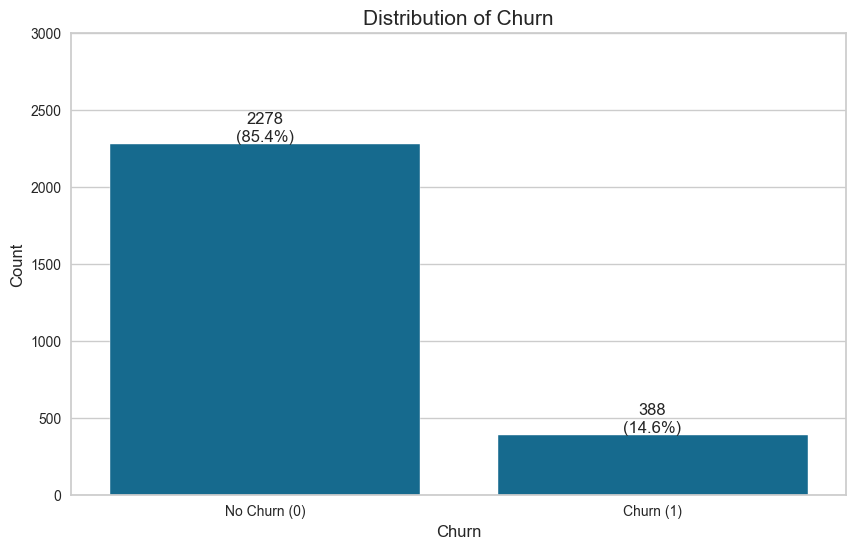

In [13]:
value_counts = train_raw.Churn.value_counts(normalize=True) * 100
total_count = len(train_raw)

plt.figure(figsize=(10, 6))
plt.ylim(0, 3000)
ax = sns.countplot(x=train_raw.Churn)

for i, p in enumerate(ax.patches):
    count = p.get_height()
    percentage = round(count / total_count * 100, 1)
    ax.annotate(f'{int(count)}\n({percentage}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)

plt.title('Distribution of Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'])

### Checking Churn Dependence on State

In [14]:
## Chi-squared test to check the dependence between Churn and State
def chi_2_test(df, col2,col1 = "Churn"):
    data = pd.crosstab(df[col1], df[col2], rownames=[col1], colnames=[col2])
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print(f"{col2} and {col1} are dependant!")
    else : 
        print(f"{col2} and {col1} are independant!")

In [15]:
chi_2_test(train_raw,"State")

p value is 0.004680701679944942
State and Churn are dependant!


In [16]:
tab = pd.crosstab(train_raw["Churn"], train_raw["State"], rownames=['Churn'], colnames=['State'], normalize = "columns")
tab.T

Churn     False     True 
State                    
AK     0.930233  0.069767
AL     0.893939  0.106061
AR     0.765957  0.234043
AZ     0.933333  0.066667
CA     0.791667  0.208333
CO     0.881356  0.118644
CT     0.813559  0.186441
DC     0.888889  0.111111
DE     0.843137  0.156863
FL     0.870370  0.129630
GA     0.836735  0.163265
HI     0.954545  0.045455
IA     0.921053  0.078947
ID     0.910714  0.089286
IL     0.911111  0.088889
IN     0.888889  0.111111
KS     0.807692  0.192308
KY     0.860465  0.139535
LA     0.914286  0.085714
MA     0.846154  0.153846
MD     0.766667  0.233333
ME     0.775510  0.224490
MI     0.775862  0.224138
MN     0.814286  0.185714
MO     0.901961  0.098039
MS     0.770833  0.229167
MT     0.811321  0.188679
NC     0.839286  0.160714
ND     0.909091  0.090909
NE     0.911111  0.088889
NH     0.790698  0.209302
NJ     0.720000  0.280000
NM     0.909091  0.090909
NV     0.786885  0.213115
NY     0.823529  0.176471
OH     0.848485  0.151515
OK     0.865385  0.134615
OR     0.887097  0.112903
PA     0.777778  0.222222
RI     0.937500  0.062500
SC     0.775510  0.224490
SD     0.877551  0.122449
TN     0.878049  0.121951
TX     0.709091  0.290909
UT     0.866667  0.133333
VA     0.940299  0.059701
VT     0.894737  0.105263
WA     0.791667  0.208333
WI     0.934426  0.065574
WV     0.920455  0.079545
WY     0.878788  0.121212

### Grouping States Based on Churn Rate

As observed from the cross-tabular data relationship above, the churn rate for a state tends to fall into one of three categories:

- **0–10%**
- **10–20%**
- **>20%**

To simplify analysis and reduce dimensionality from 51 categorical state values, we group states based on their churn rate into the following categories:

| State Group | Churn Rate Range       |
|-------|-------------------------|
| 0     | 0% ≤ churn rate < 10%   |
| 1     | 10% ≤ churn rate < 20%  |
| 2     | churn rate ≥ 20%        |

This new categorical column can be used in place of the original `State` column for more efficient modeling and clearer interpretation.


In [17]:
churn_more10 = list(tab.iloc[1][((tab.iloc[1] > 0.1) & (tab.iloc[1] < 0.2))].index)
churn_more20 = list(tab.iloc[1][(tab.iloc[1] > 0.2)].index)
churn_less10 = list(tab.iloc[1][tab.iloc[1] < 0.1].index)

In [18]:
train_raw["State"].replace(churn_less10,0, inplace = True)
train_raw["State"].replace(churn_more10,1, inplace = True)
train_raw["State"].replace(churn_more20,2, inplace = True)

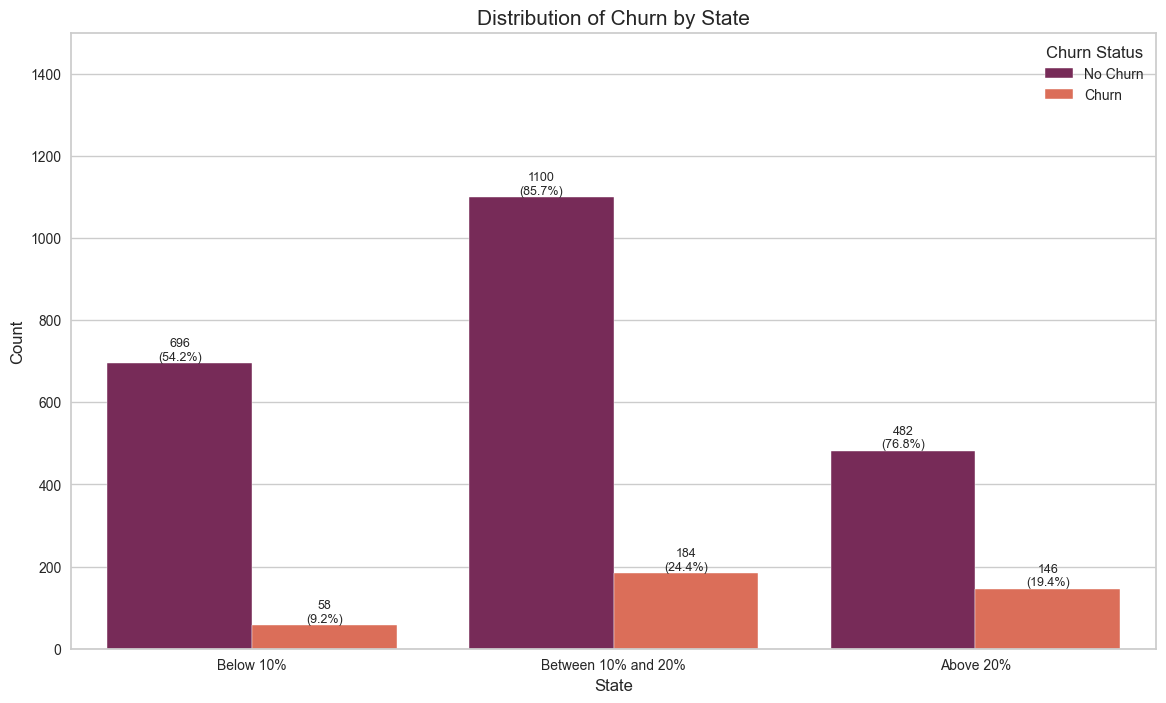

In [19]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=train_raw, x="State", hue="Churn", palette='rocket')
plt.ylim(0, 1500)

state_counts = train_raw.groupby(['State', 'Churn']).size().unstack(fill_value=0)
state_totals = state_counts.sum(axis=1)

for i, p in enumerate(ax.patches):

    count = p.get_height()
    state_idx = i // 2
    churn_idx = i % 2

    state_name = train_raw['State'].unique()[state_idx] if state_idx < len(train_raw['State'].unique()) else None
    
    if state_name is not None:
        percentage = round((count / state_totals[state_name]) * 100, 1) if count > 0 else 0
        ax.annotate(f'{int(count)}\n({percentage}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=9, rotation=0)

plt.xticks(range(len(train_raw['State'].unique())), ["Below 10%", "Between 10% and 20%", "Above 20%"])

plt.title('Distribution of Churn by State', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Churn Status', labels=['No Churn', 'Churn'])

In [20]:
chi_2_test(train_raw,"State")

p value is 3.164053922894711e-15
State and Churn are dependant!


## Analysis of Numerical Features

In [21]:
num_features = ["Account length",
    "Number vmail messages",
    'Total day minutes',
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total eve charge',
    'Total night minutes',
    'Total night calls',
    'Total night charge',
    'Total intl minutes',
    'Total intl calls',
    'Total intl charge']

<Figure size 1400x800 with 0 Axes>

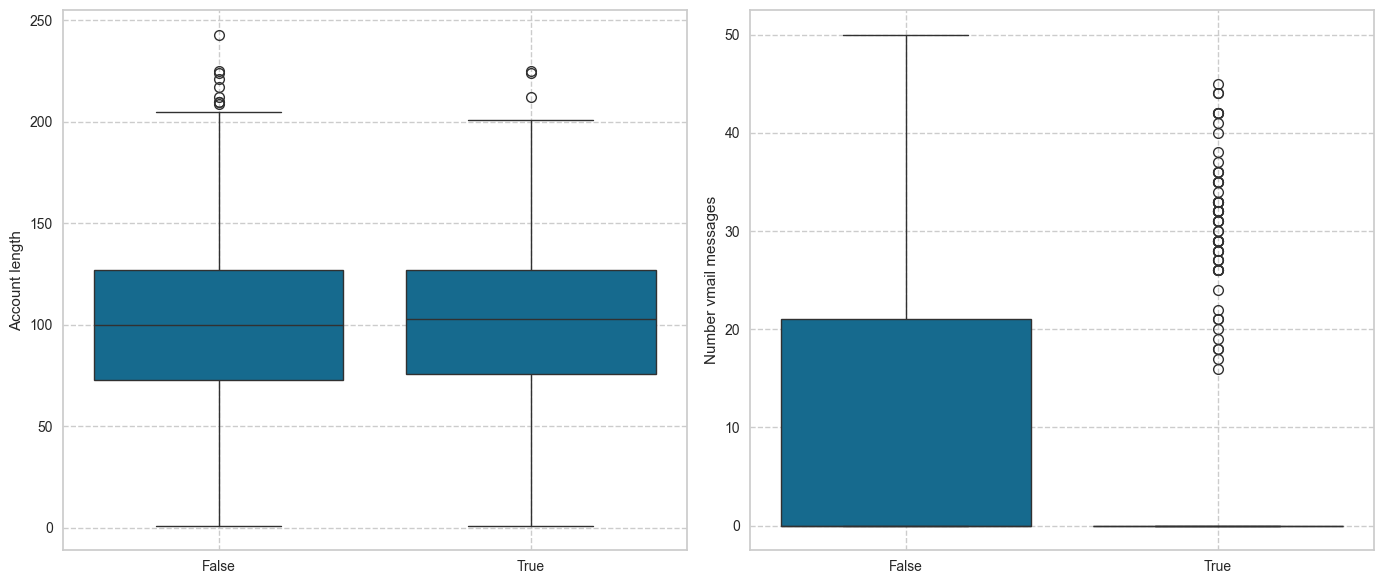

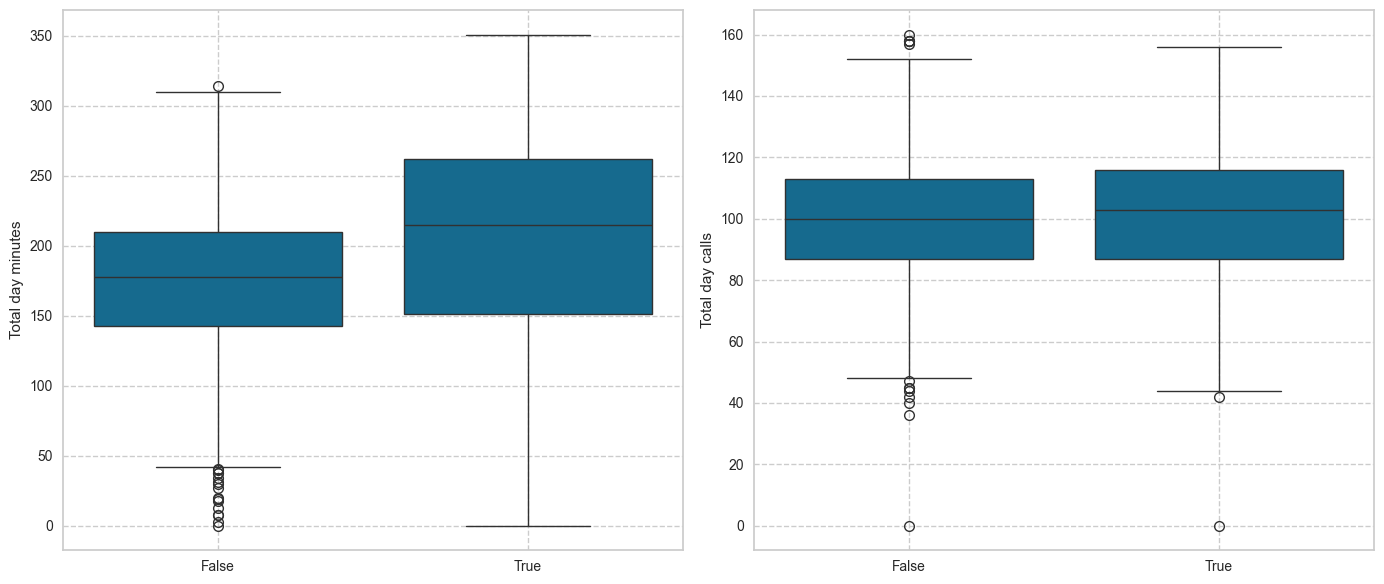

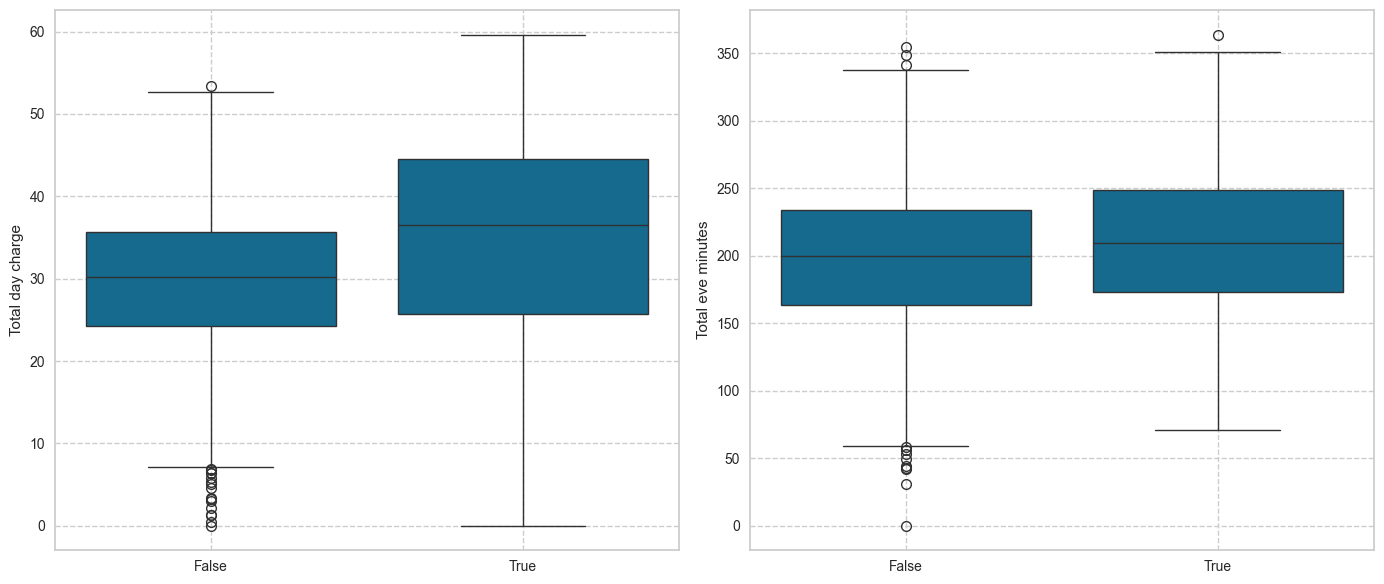

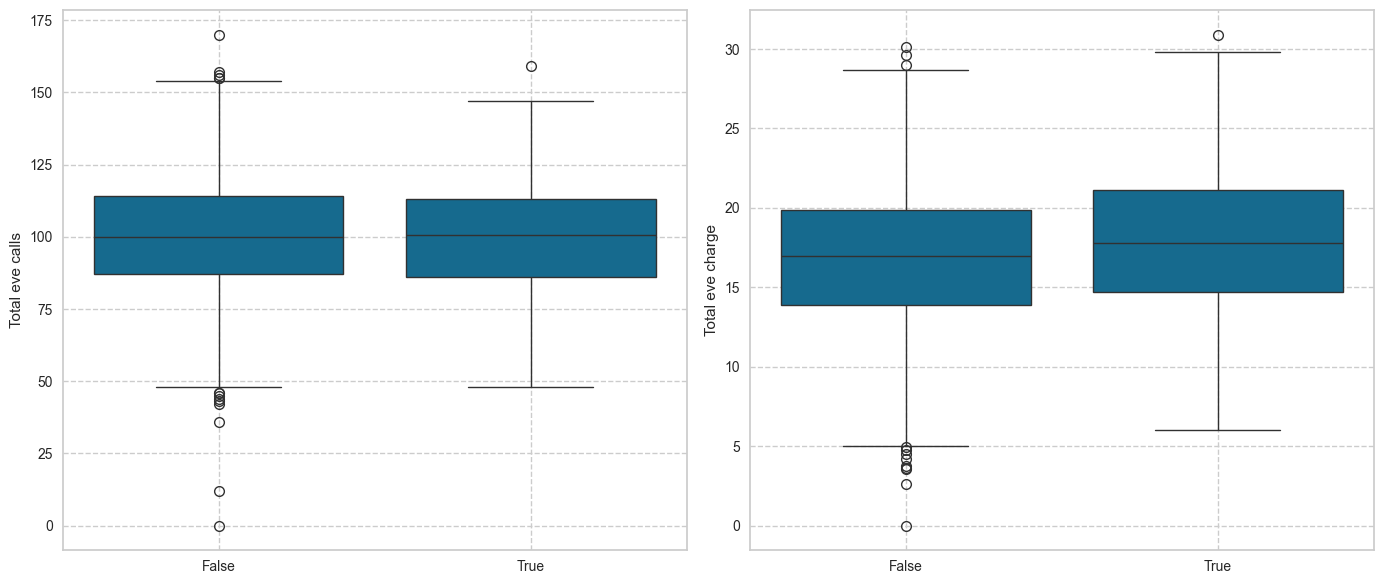

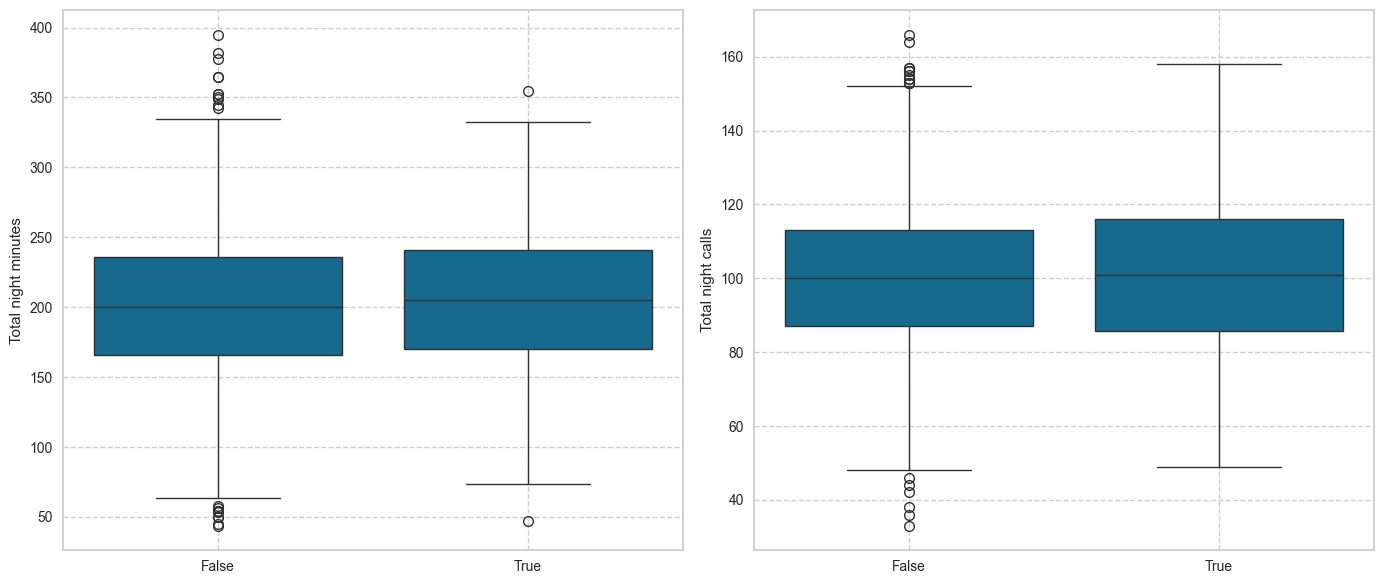

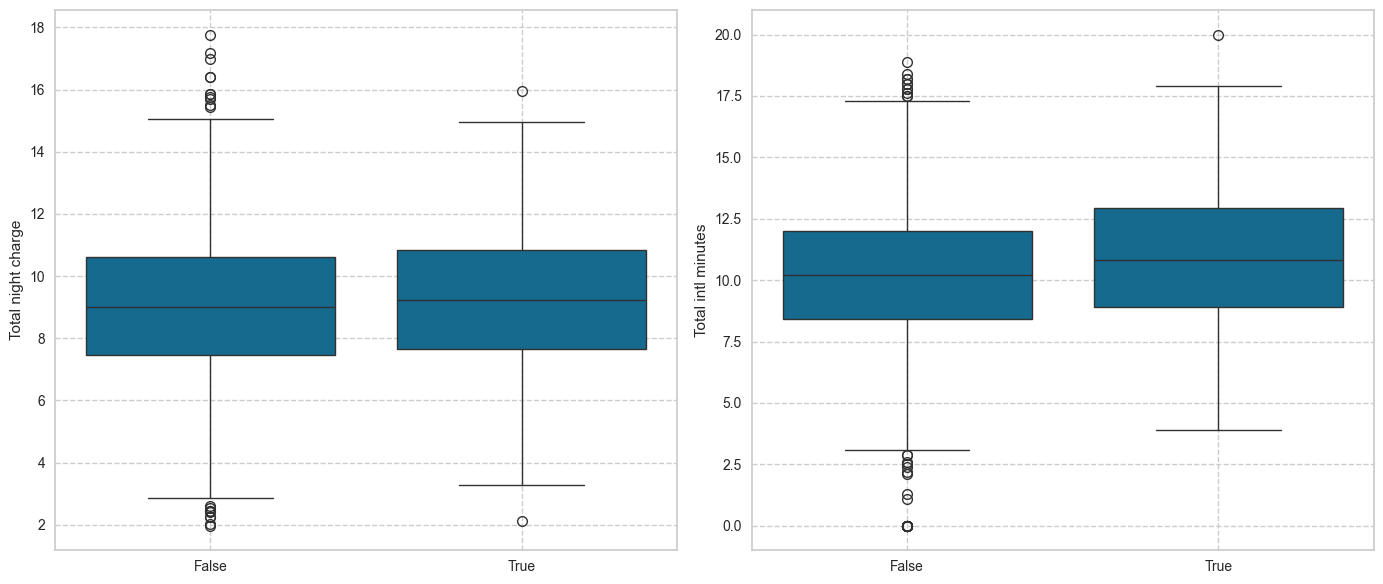

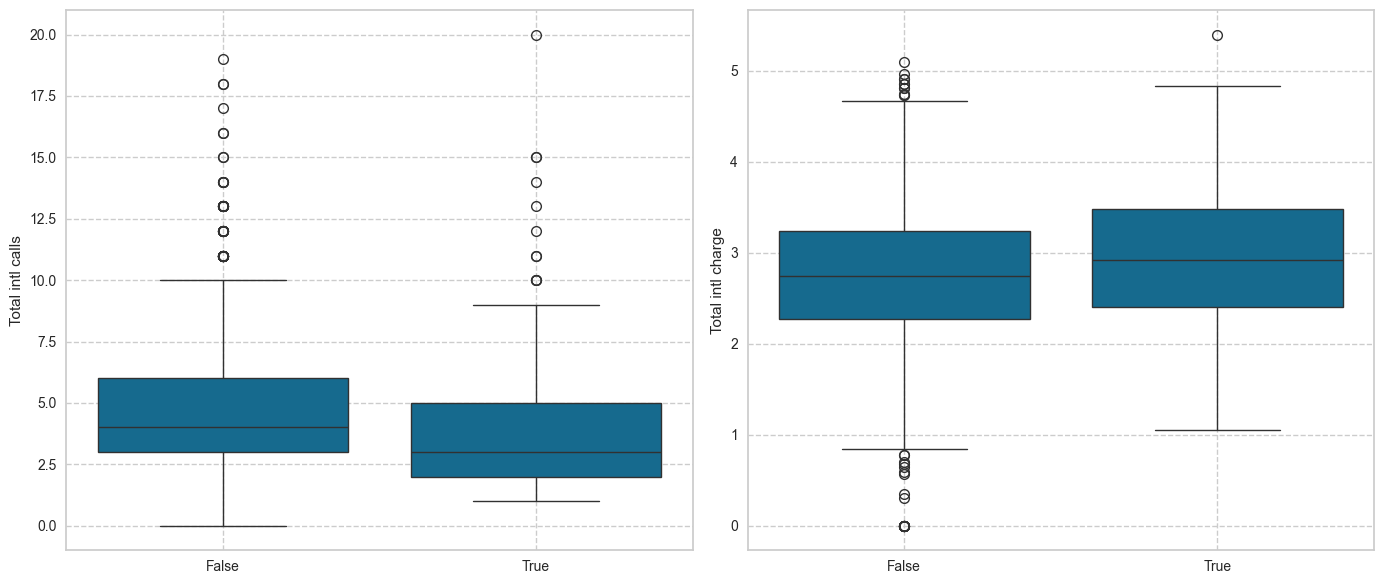

In [22]:
plt.figure(figsize=(14, 8))
for i in range(0, len(num_features), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.boxplot(train_raw, y=num_features[i], x="Churn", ax=axes[0])
    axes[0].grid(True, which='both', linestyle='--')
    axes[0].set(xlabel='')
    
    if i+1 < len(num_features):
        sns.boxplot(train_raw, y=num_features[i+1], x="Churn", ax=axes[1])
        axes[1].grid(True, which='both', linestyle='--')
        axes[1].set(xlabel='')
    else:
        axes[1].set_visible(False)
    
    plt.tight_layout()
    plt.show()

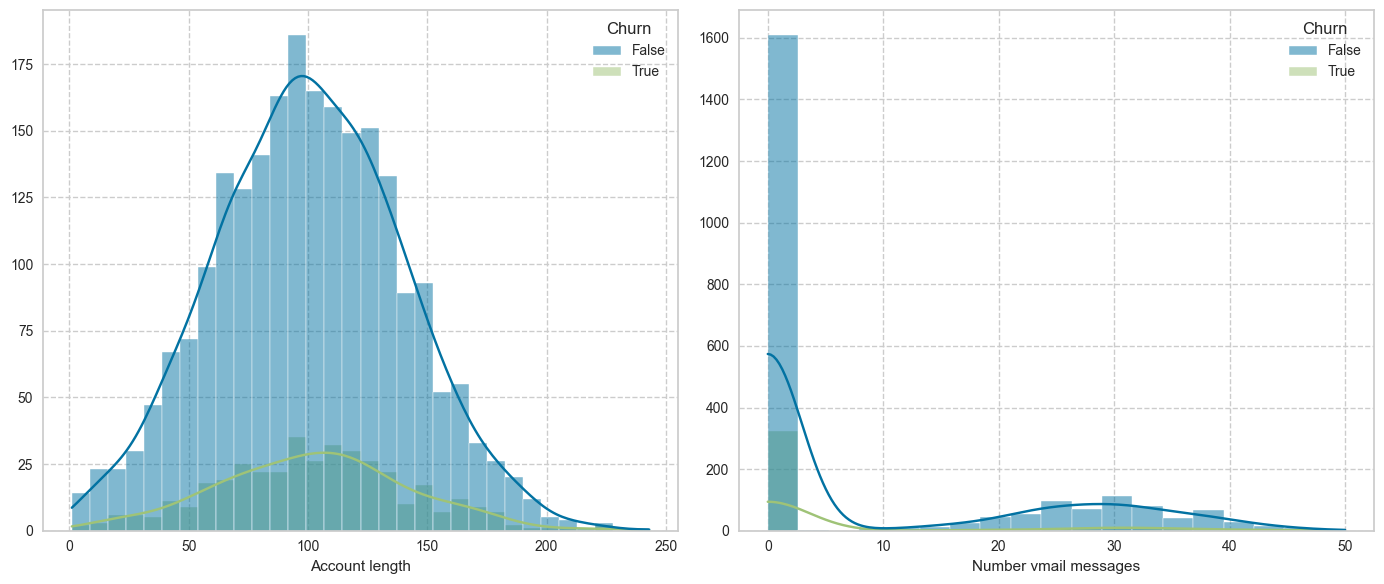

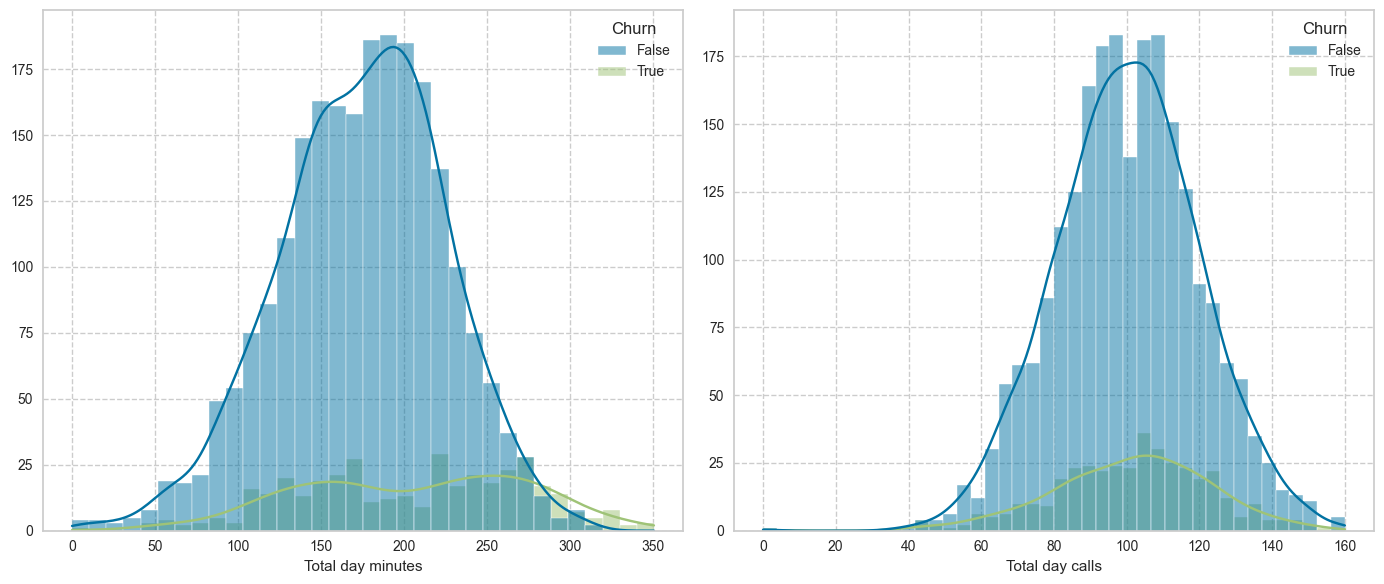

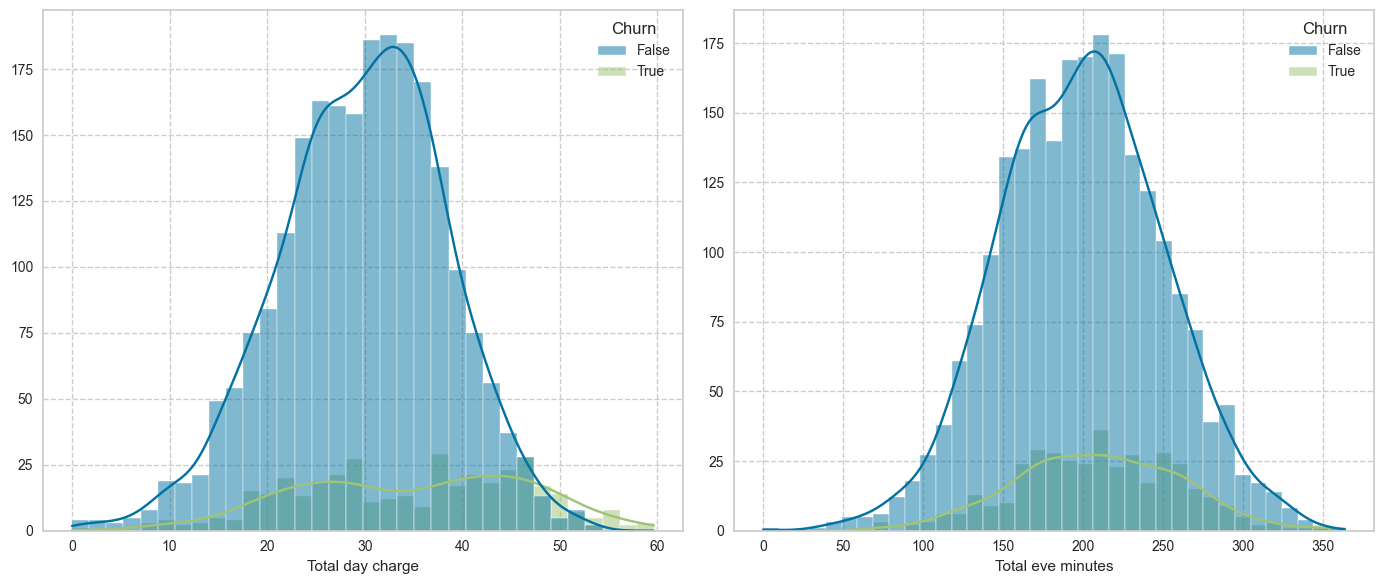

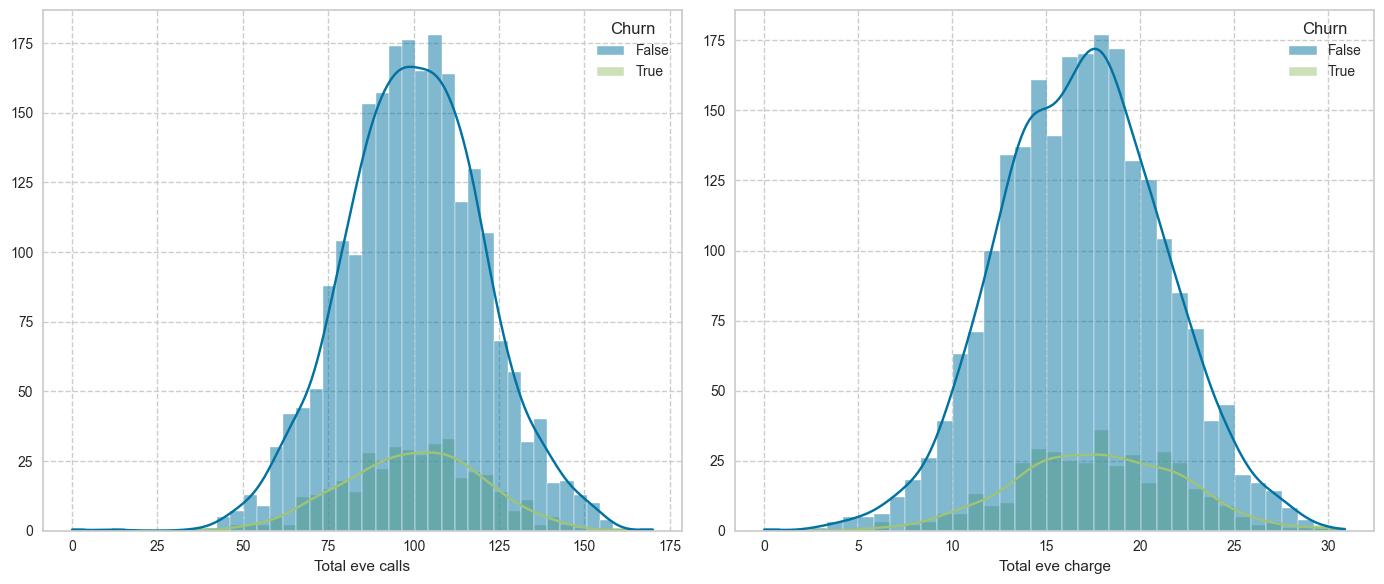

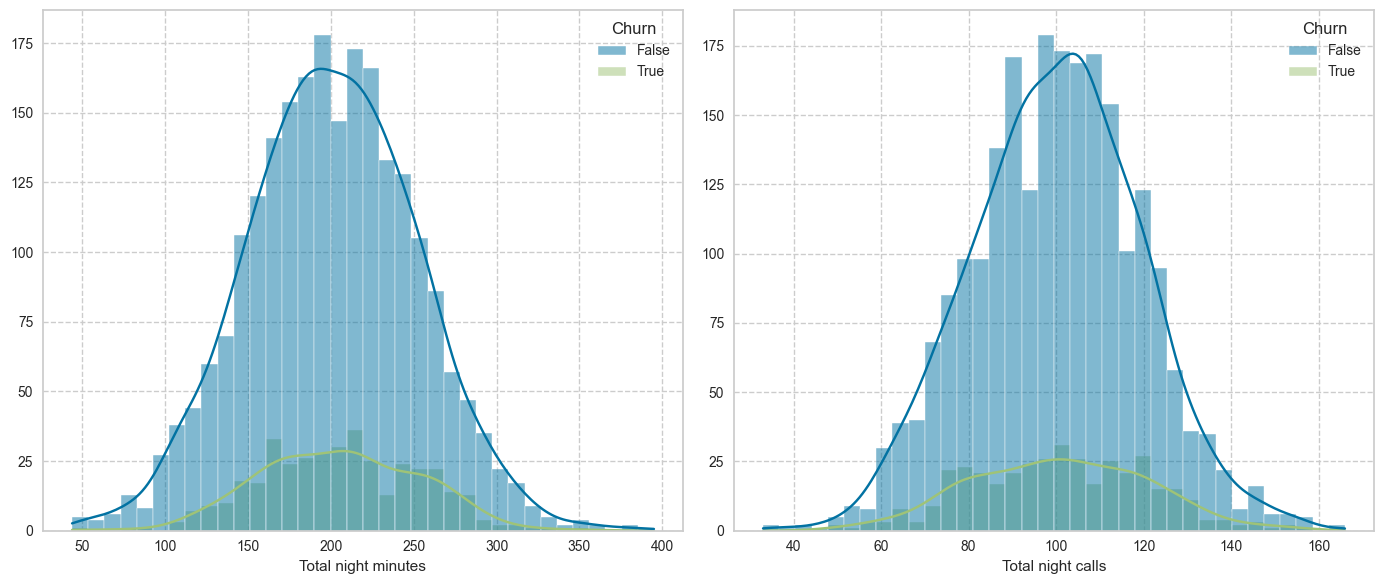

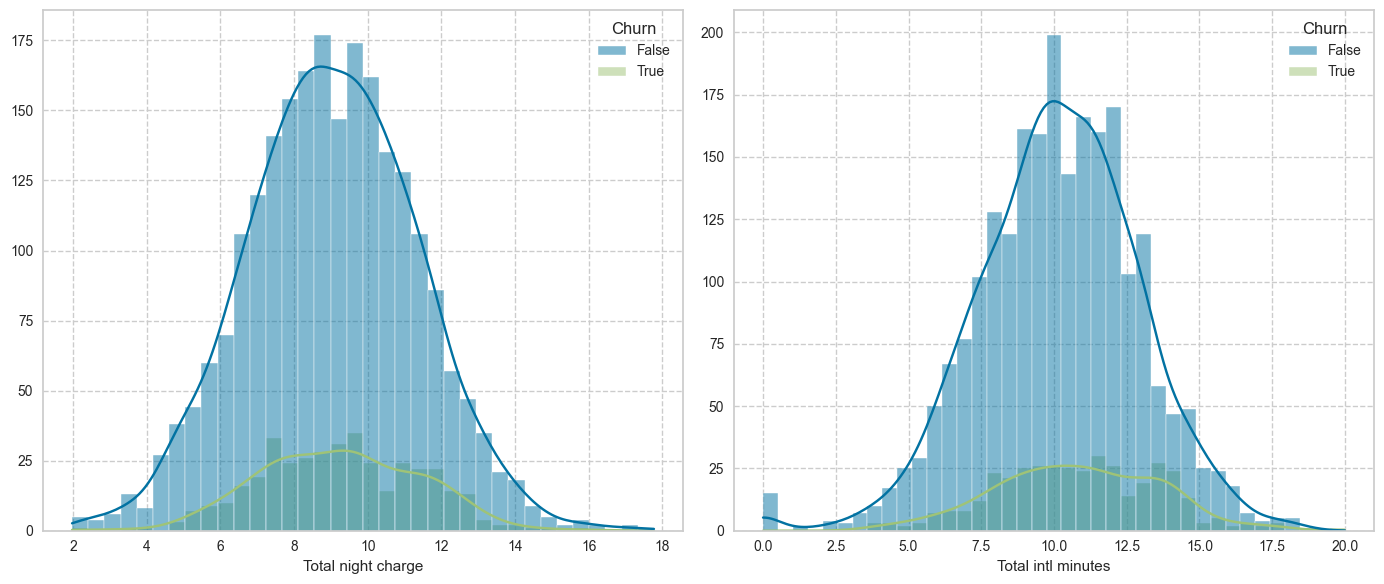

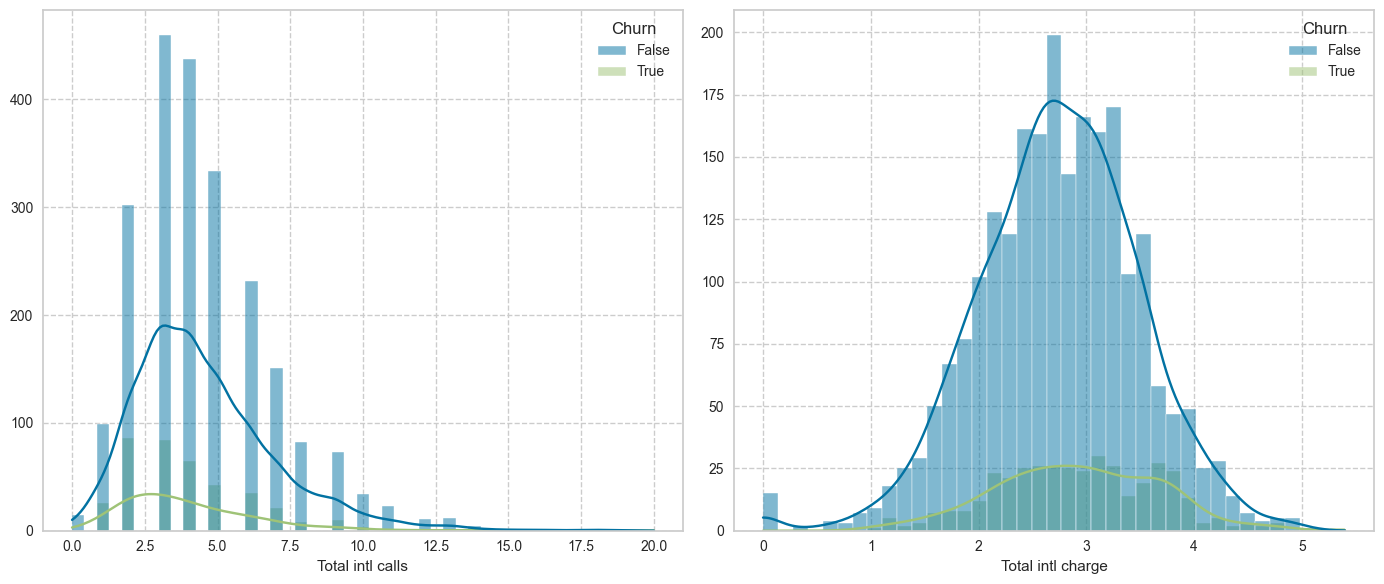

In [23]:
for i in range(0, len(num_features), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(train_raw, x=num_features[i], hue="Churn", kde=True, ax=axes[0])
    axes[0].grid(True, which='both', linestyle='--')
    axes[0].set(ylabel='')

    if i+1 < len(num_features):
        sns.histplot(train_raw, x=num_features[i+1], hue="Churn", kde=True, ax=axes[1])
        axes[1].grid(True, which='both', linestyle='--')
        axes[1].set(ylabel='')
    else:
        axes[1].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## Outlier Analysis

In [24]:
### Using z-score to detect outliers
def outlier_set(data, variance_bound):
    outliers = []
    zscore = []
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > variance_bound:
            outliers.append(i)
    return set(outliers)

In [25]:
for col in num_features:
    print(f"Outliers of {col} are: ",outlier_set(train_raw[col], variance_bound = 3))

Outliers of Account length are:  {224, 225, 243, 221}
Outliers of Number vmail messages are:  {50}
Outliers of Total day minutes are:  {0.0, 2.6, 7.9, 7.8, 12.5, 345.3, 346.8, 350.8}
Outliers of Total day calls are:  {40, 0, 36}
Outliers of Total day charge are:  {0.0, 1.34, 2.13, 0.44, 58.7, 1.33, 58.96, 59.64}
Outliers of Total eve minutes are:  {0.0, 354.2, 42.2, 43.9, 42.5, 363.7, 31.2}
Outliers of Total eve calls are:  {0, 170, 12, 36}
Outliers of Total eve charge are:  {0.0, 2.65, 3.73, 3.61, 3.59, 30.91, 30.11}
Outliers of Total night minutes are:  {354.9, 43.7, 364.3, 45.0, 395.0, 364.9, 47.4, 377.5, 381.9}
Outliers of Total night calls are:  {33, 164, 36, 38, 166}
Outliers of Total night charge are:  {1.97, 2.03, 2.13, 15.97, 16.39, 17.19, 16.99, 17.77, 16.42}
Outliers of Total intl minutes are:  {0.0, 1.3, 1.1, 18.9, 20.0}
Outliers of Total intl calls are:  {12, 13, 14, 15, 16, 17, 18, 19, 20}
Outliers of Total intl charge are:  {0.0, 0.35, 0.3, 5.1, 5.4}


## Multi-Colinearity Detection

<AxesSubplot: >

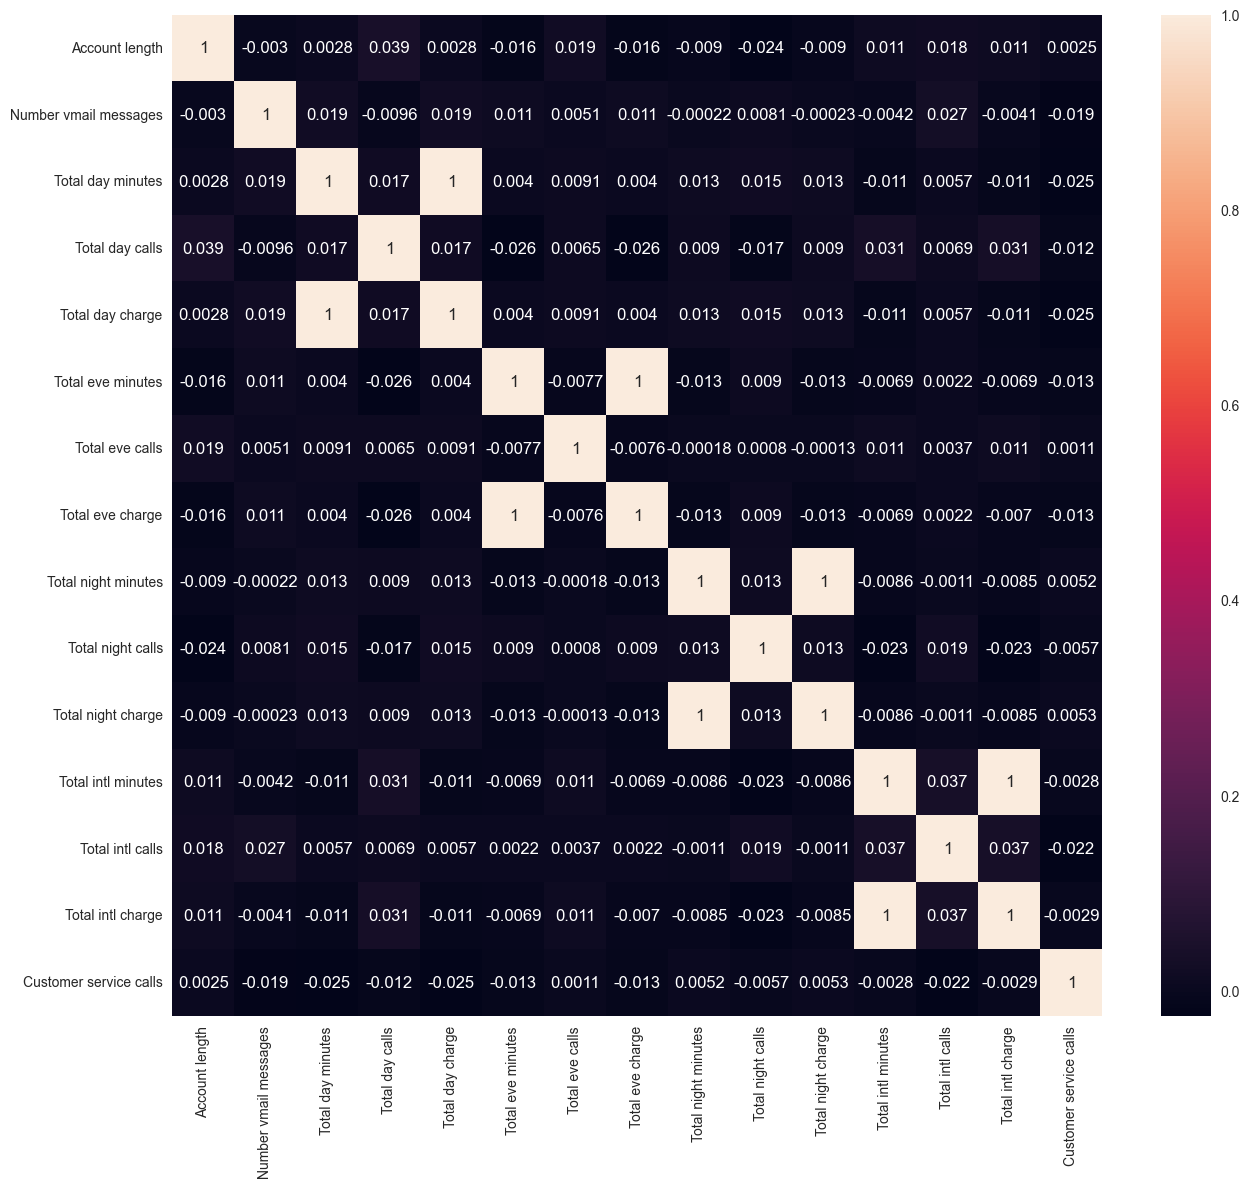

In [26]:
plt.figure(figsize = (15,13))
sns.heatmap(train_raw[num_cols].corr(), annot = True)

We can see from the correlation matrix above that we have directly correlated variables. Total day minutes has a correlation of 1 with Total day charge. Similarly for Total eve charge and Total eve minutes, Total night minutes and Total night charge, Total international minutes and Total international charge. These high correlations make sense since the more time is spent on call, the higher the charge will be. We do not needs both variables (charge and minutes) as they are essentially relaying the same information so we drop "Total day minutes", "Total eve charge", "Total night minutes" and "Total international minutes"

In [27]:
drop_candidates = ["Total day minutes", "Total eve charge", "Total night minutes", "Total intl minutes"]

<AxesSubplot: >

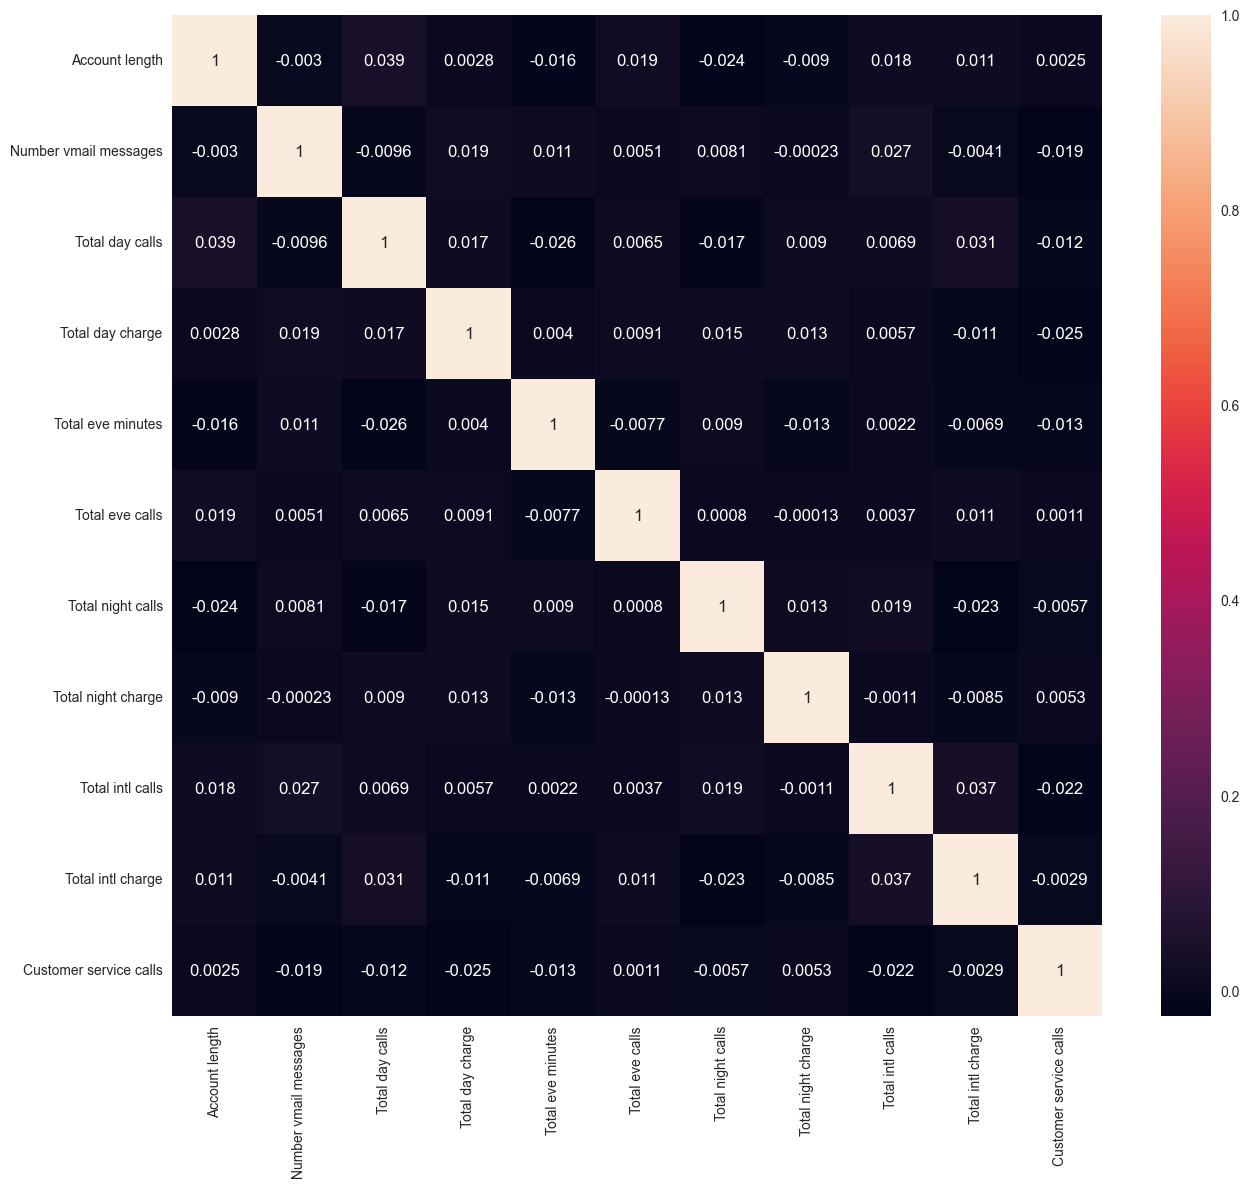

In [28]:
plt.figure(figsize = (15,13))
sns.heatmap(train_raw[num_cols].drop(drop_candidates, axis = 1).corr(), annot = True)

In [29]:
train_raw.replace(["No","Yes"],[0,1], inplace = True)  ### encoding categorical variables
train_raw.replace([False,True],[0,1], inplace = True)

In [30]:
SAVE_DIR = os.path.join(DATA_DIR, 'post-processing')
output_path = os.path.join(SAVE_DIR, 'train_processed.csv')
train_raw.to_csv(output_path)

In [31]:
train_processsed = train_raw.drop("Churn", axis = 1)
val_processed = train_raw["Churn"]

In [32]:
processed_train, processed_test, val_train, val_test = train_test_split(train_processsed, val_processed, test_size = 0.2, random_state = 42, stratify = val_processed)

### Transforming Features

In [33]:
class CustomFeatures(BaseEstimator, TransformerMixin):
    def __init__(self,to_drop):
        self.to_drop = to_drop

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X["Total number of minutes"] = X["Total day minutes"] + X["Total eve minutes"] + X["Total night minutes"]
        X["Total minutes per call"] = (X["Total number of minutes"]) / (X["Total day calls"] + X["Total eve calls"] + X["Total night calls"])
        X["Average charge per call"] = (X["Total day charge"] + X["Total eve charge"] + X["Total night charge"]) / (X["Total number of minutes"])
        X["International usage rate"] = (X["Total intl minutes"]) / (X["Total number of minutes"])
        
        return X.drop(self.to_drop, axis = 1)

In [34]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, num_features, cat_features, onehot_features, scaler=StandardScaler()):
        self.scaler = scaler
        self.num_features = num_features
        self.cat_features = cat_features
        self.onehot_features = onehot_features

    def fit(self, X, y=None):
        self.scaler.fit(X[self.num_features])
        return self

    def transform(self, X):
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.num_features]),
                                columns=X[self.num_features].columns,
                                index=X[self.num_features].index)           ### scaling numerical features
        dummies = pd.get_dummies(X[self.onehot_features].astype("object")).iloc[:,:2]           ### one-hot encoding categorical features
        X = pd.concat([X[self.cat_features],X_scaled], axis = 1)
        X = pd.concat([X,dummies], axis = 1)
        return X

In [35]:
cat_features =["State","International plan","Voice mail plan", "Customer service calls"]
one_hot_features = ["Area code"]
num_features = ["Account length",
    "Number vmail messages",
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total night calls',
    'Total night charge',
    'Total intl calls',
    'Total intl charge',
    "Total number of minutes",
    "Total minutes per call",
    "Average charge per call",
    "International usage rate"]

In [36]:
pipeline = Pipeline(
    steps=[
        ('feature_creation', CustomFeatures(drop_candidates)),('scaling', FeatureScaler(num_features, cat_features, one_hot_features))
    ])

In [37]:
processed_train_wf = pipeline.fit_transform(processed_train)
processed_test_wf = pipeline.transform(processed_test)

Now that we have removed highly correlated features (feature selection) and performed feature transformation, we are ready to perform segmentation and churn prediction.

## Customer Segmentation

In [38]:
clustering_data = processed_train_wf.copy()

We use the elbow method and silhouette score to determine the optimal number of clusters for KMeans clustering. 

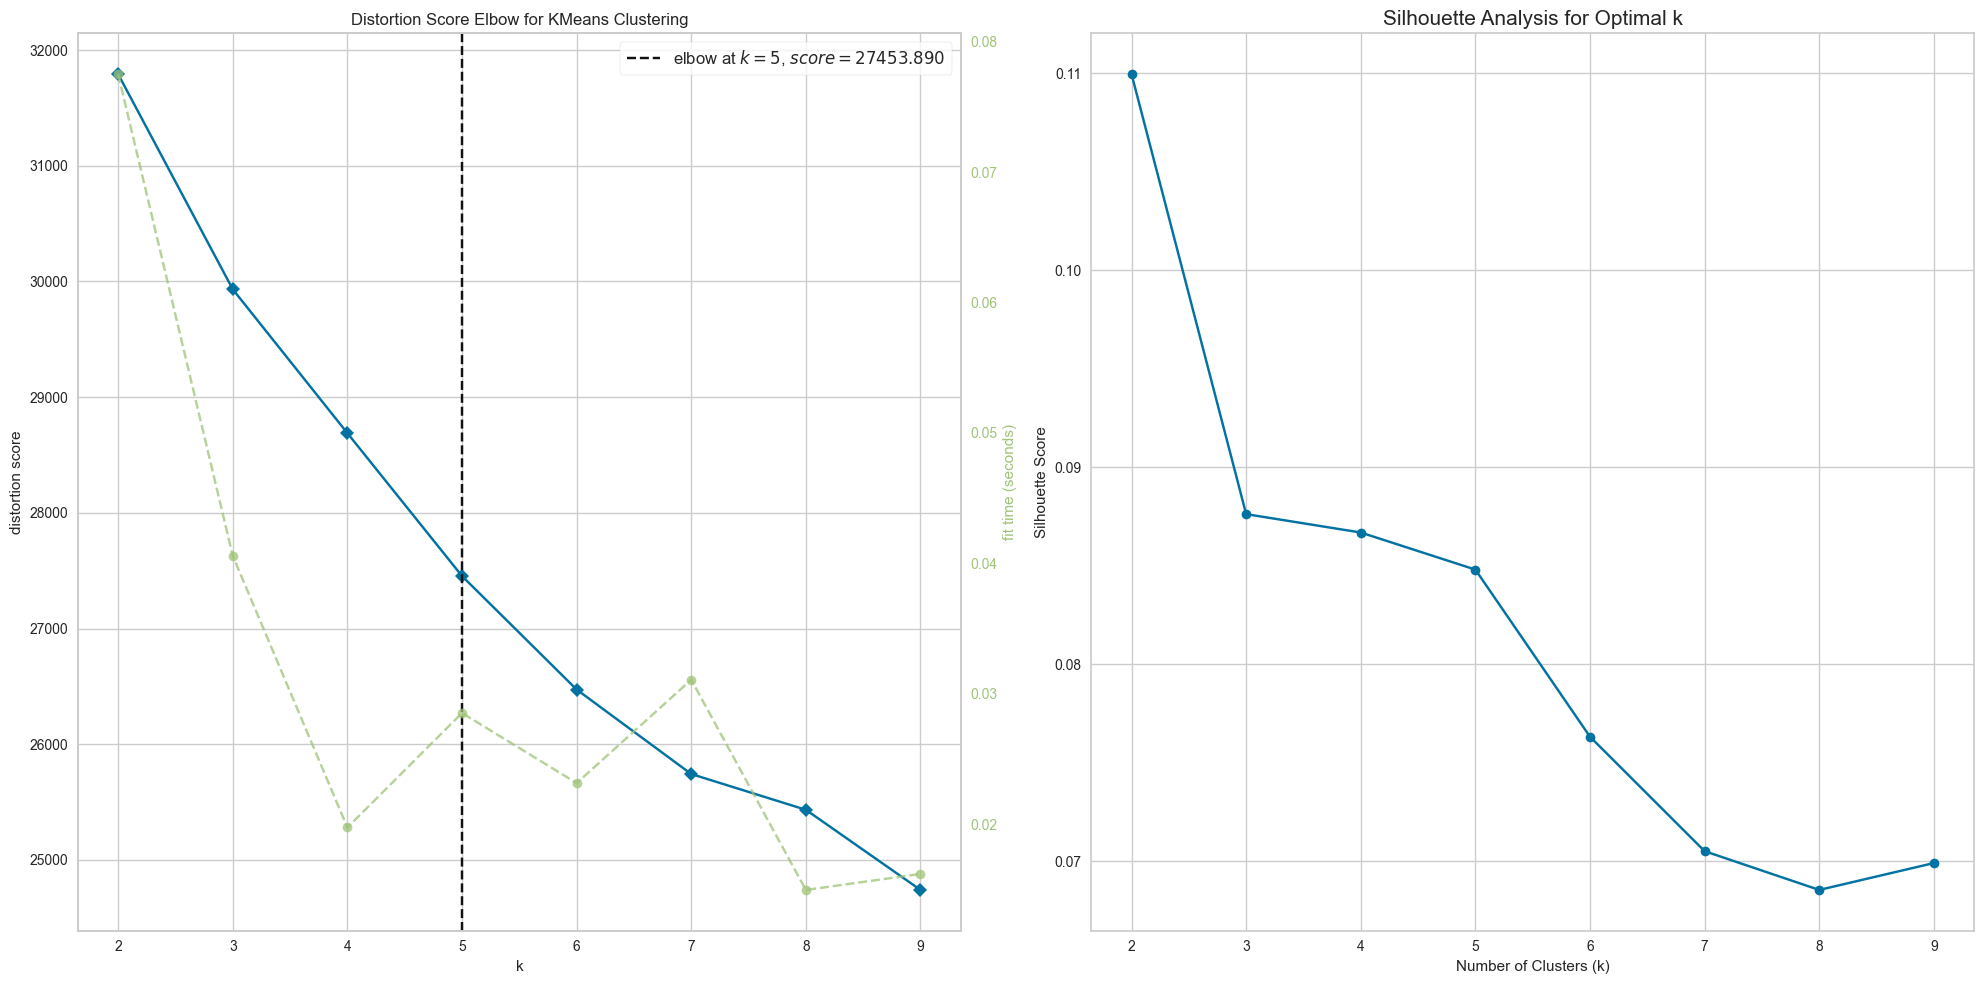

In [39]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
elbow_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
elbow_visualizer.fit(clustering_data)
elbow_visualizer.finalize()
# plt.title('Elbow Method for Optimal k', fontsize=15)

plt.subplot(1, 2, 2)
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(clustering_data)
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k', fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.show()

In [40]:
optimal_k = elbow_visualizer.elbow_value_
print(f"Optimal number of clusters determined: {optimal_k}")

Optimal number of clusters determined: 5


In [41]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(clustering_data)

In [42]:
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(clustering_data)

In [43]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(clustering_data)

In [44]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data)
print(f"Explained variance ratio by first two principal components: {pca.explained_variance_ratio_}")

Explained variance ratio by first two principal components: [0.18960093 0.11540566]


# HyperParameter search for DBSCAN

In [45]:
eps_range = np.linspace(1.73, 5.19, 10)
min_samples_values = [3, 5, 7, 10, 15, 20]
results = []

In [46]:
for eps in eps_range:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(clustering_data)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        n_noise = list(labels).count(-1)
        noise_percentage = n_noise / len(labels) * 100

        if n_clusters < 2:
            continue

        non_noise_indices = labels != -1
        if np.sum(non_noise_indices) > n_clusters:
            try:
                silhouette_avg = silhouette_score(
                    clustering_data[non_noise_indices], 
                    labels[non_noise_indices]
                )

                ch_score = calinski_harabasz_score(
                    clustering_data[non_noise_indices], 
                    labels[non_noise_indices]
                )

                results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'noise_percentage': noise_percentage,
                    'silhouette': silhouette_avg,
                    'calinski_harabasz': ch_score
                })
                
                print(f"eps={eps:.2f}, min_samples={min_samples}, clusters={n_clusters}, "
                      f"noise={noise_percentage:.1f}%, silhouette={silhouette_avg:.3f}")
                
            except Exception as e:
                print(f"Error with eps={eps}, min_samples={min_samples}: {str(e)}")
                continue


eps=1.73, min_samples=3, clusters=6, noise=98.5%, silhouette=0.293
eps=2.11, min_samples=3, clusters=44, noise=77.6%, silhouette=-0.072
eps=2.11, min_samples=5, clusters=12, noise=89.5%, silhouette=-0.027
eps=2.11, min_samples=7, clusters=6, noise=94.8%, silhouette=0.094
eps=2.11, min_samples=10, clusters=3, noise=97.9%, silhouette=0.135
eps=2.50, min_samples=3, clusters=15, noise=40.7%, silhouette=-0.126
eps=2.50, min_samples=5, clusters=2, noise=49.9%, silhouette=0.087
eps=2.50, min_samples=7, clusters=2, noise=56.8%, silhouette=0.026
eps=2.50, min_samples=10, clusters=2, noise=63.9%, silhouette=0.041
eps=2.50, min_samples=15, clusters=3, noise=73.7%, silhouette=0.052
eps=2.50, min_samples=20, clusters=2, noise=81.0%, silhouette=0.159


In [47]:
results_df = pd.DataFrame(results)

In [48]:
results_df['normalized_ch'] = (results_df['calinski_harabasz'] - results_df['calinski_harabasz'].min()) / (results_df['calinski_harabasz'].max() - results_df['calinski_harabasz'].min())
results_df['base_score'] = (results_df['silhouette'] + results_df['normalized_ch']) / 2

results_df['noise_penalty'] = np.exp(-0.1 * (results_df['noise_percentage'] - 15))
results_df.loc[results_df['noise_percentage'] > 30, 'noise_penalty'] *= 0.5

results_df['adjusted_score'] = results_df['base_score'] * results_df['noise_penalty']

In [49]:
best_config = results_df.loc[results_df['adjusted_score'].idxmax()]
print("\nBest configuration:")
print(best_config)


Best configuration:
eps                   2.498889
min_samples           5.000000
n_clusters            2.000000
noise_percentage     49.859287
silhouette            0.087022
calinski_harabasz     6.907720
normalized_ch         0.200476
base_score            0.143749
noise_penalty         0.015313
adjusted_score        0.002201
Name: 6, dtype: float64


In [50]:
optimal_eps = best_config['eps']
optimal_samples = int(best_config['min_samples'])

In [51]:
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_samples)
dbscan_labels = dbscan.fit_predict(clustering_data)

In [52]:
processed_train['KMeans_Cluster'] = kmeans_labels
processed_train['Hierarchical_Cluster'] = hierarchical_labels
processed_train['GMM_Cluster'] = gmm_labels
processed_train['DBSCAN_Cluster'] = dbscan_labels

In [53]:
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2']
)

In [54]:
pca_df['KMeans_Cluster'] = kmeans_labels
pca_df['Hierarchical_Cluster'] = hierarchical_labels
pca_df['GMM_Cluster'] = gmm_labels
pca_df['DBSCAN_Cluster'] = dbscan_labels
pca_df['Churn'] = val_train.values

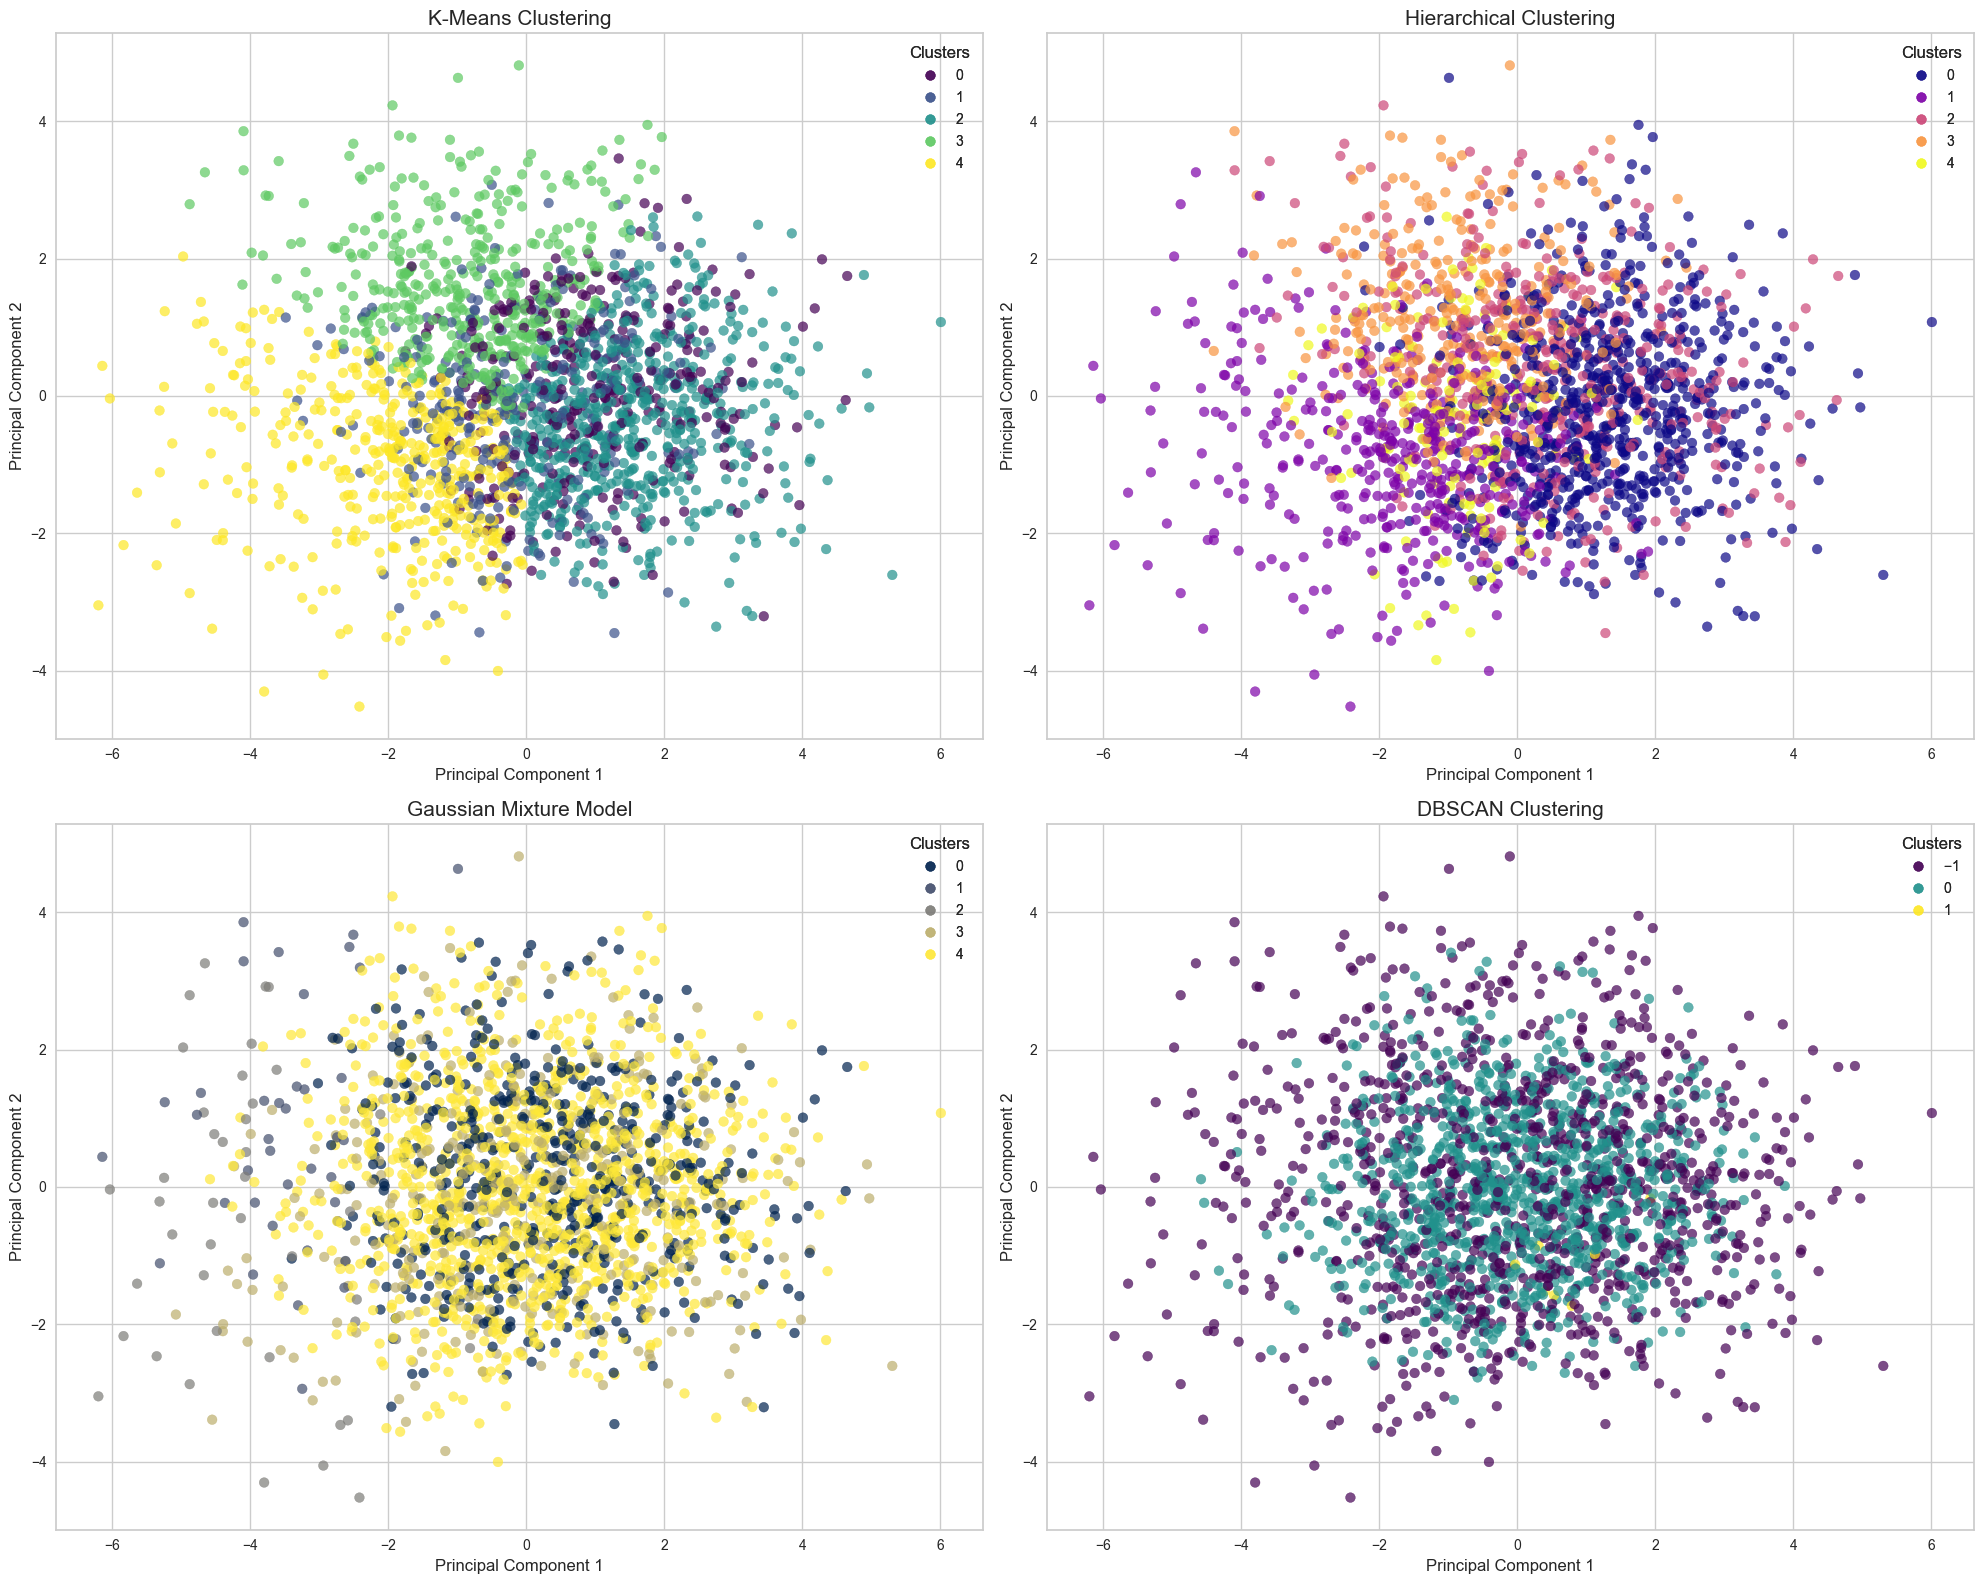

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

scatter = axes[0].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_title('K-Means Clustering', fontsize=15)
axes[0].set_xlabel('Principal Component 1', fontsize=12)
axes[0].set_ylabel('Principal Component 2', fontsize=12)
legend1 = axes[0].legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
axes[0].add_artist(legend1)
axes[0].grid(True)

scatter = axes[1].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Hierarchical_Cluster'], cmap='plasma', alpha=0.7)
axes[1].set_title('Hierarchical Clustering', fontsize=15)
axes[1].set_xlabel('Principal Component 1', fontsize=12)
axes[1].set_ylabel('Principal Component 2', fontsize=12)
legend2 = axes[1].legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
axes[1].add_artist(legend2)
axes[1].grid(True)

scatter = axes[2].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['GMM_Cluster'], cmap='cividis', alpha=0.7)
axes[2].set_title('Gaussian Mixture Model', fontsize=15)
axes[2].set_xlabel('Principal Component 1', fontsize=12)
axes[2].set_ylabel('Principal Component 2', fontsize=12)
legend3 = axes[2].legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
axes[2].add_artist(legend3)
axes[2].grid(True)

scatter = axes[3].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['DBSCAN_Cluster'], cmap='viridis', alpha=0.7)
axes[3].set_title('DBSCAN Clustering', fontsize=15)
axes[3].set_xlabel('Principal Component 1', fontsize=12)
axes[3].set_ylabel('Principal Component 2', fontsize=12)
legend4 = axes[3].legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
axes[3].add_artist(legend4)
axes[3].grid(True)

plt.tight_layout()
plt.show()

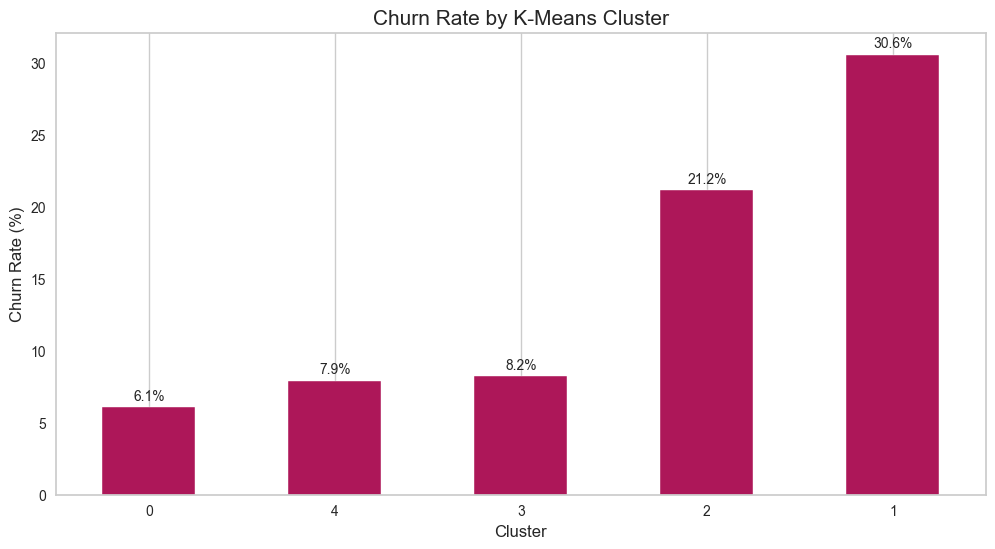

In [56]:
cluster_churn = pd.crosstab(processed_train['KMeans_Cluster'], val_train, normalize='index') * 100

plt.figure(figsize=(12, 6))
cluster_churn[1].sort_values().plot(kind='bar', color=sns.color_palette("rocket")[2])
plt.title('Churn Rate by K-Means Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=0)

for i, v in enumerate(cluster_churn[1].sort_values()):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.show()

In [57]:
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=clustering_data.columns
)

In [58]:
feature_means = processed_train_wf.mean()
feature_stds = processed_train_wf.std()

For K-Means clustering, we obtain 5 clusters where two have very high churn rates - 30% and 21% and the other three have significantly lower churn rates - 6%, 8% and 8%. To understand the clusters of customers we look at the relative feature importance for each cluster. This will also indicate why two clusters have higher churn rates than the other three. 

In [59]:
relative_importance = pd.DataFrame()
for i in range(optimal_k):
    relative_importance[f'Cluster_{i}'] = (cluster_centers.iloc[i] - feature_means) / feature_stds

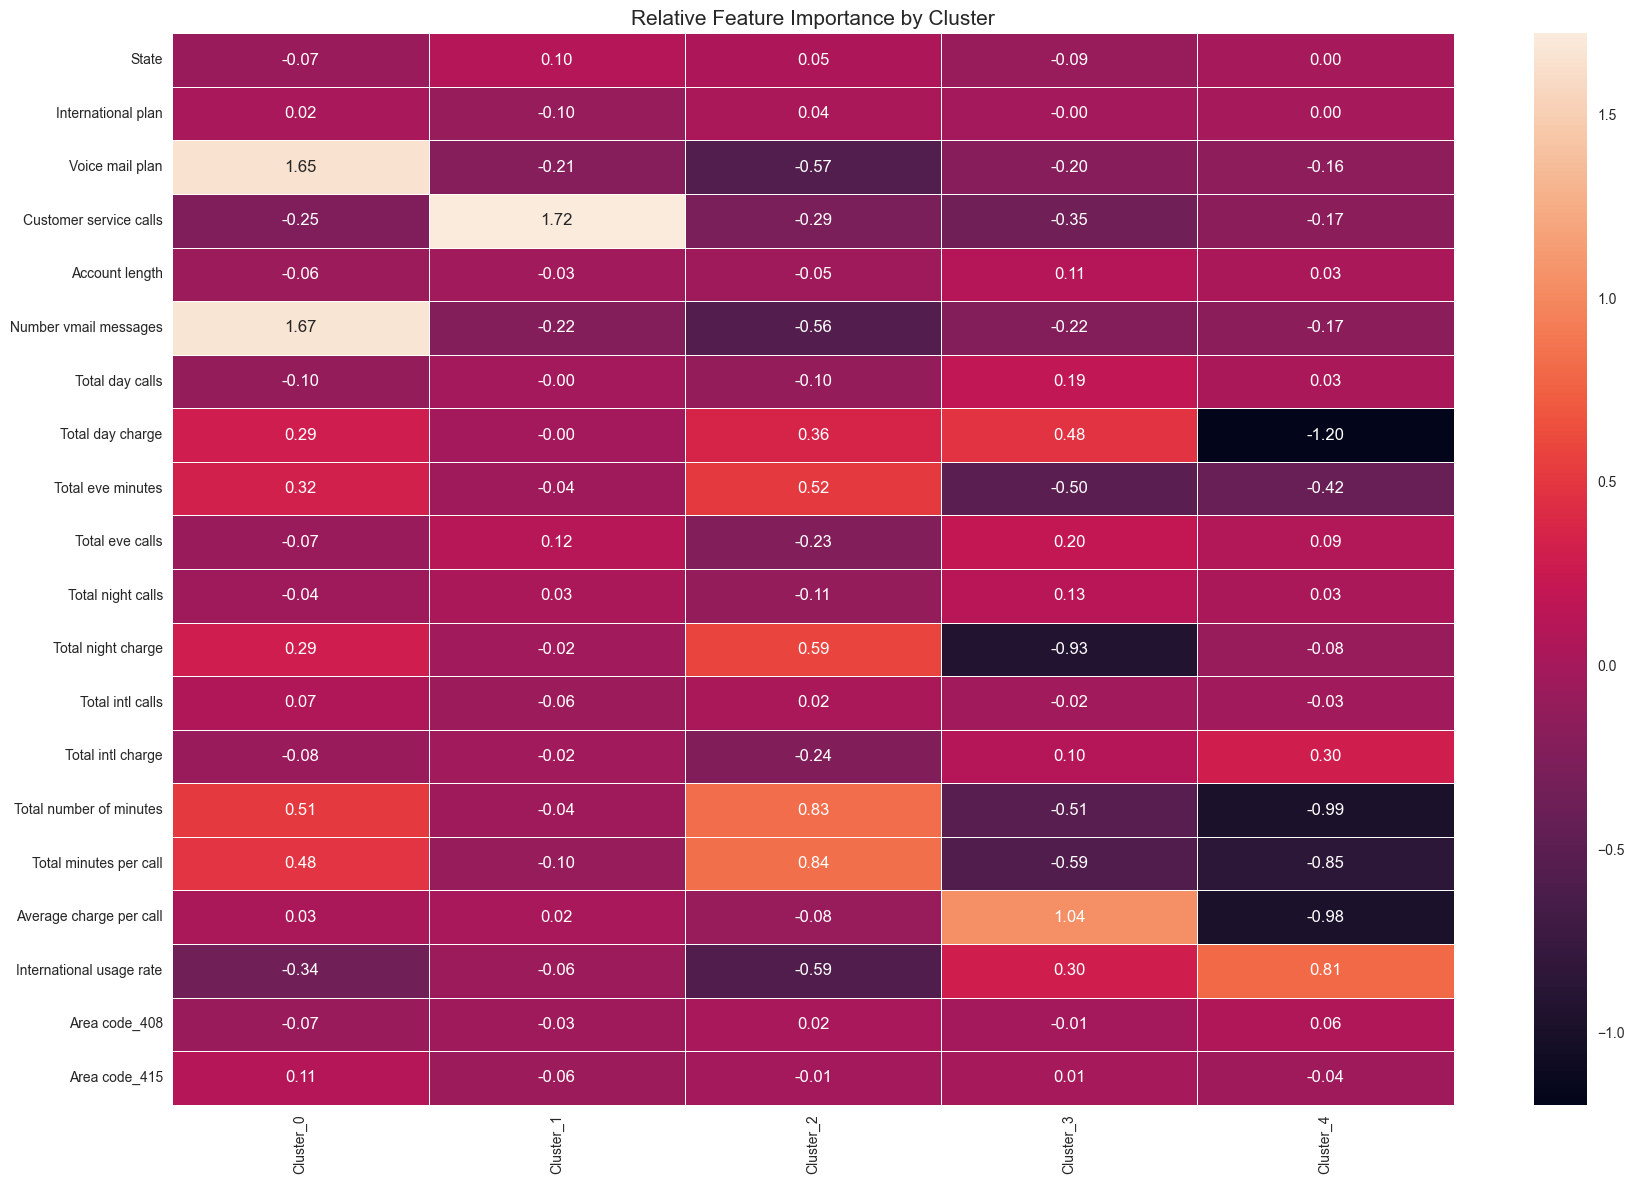

In [60]:
plt.figure(figsize=(18, 12))
sns.heatmap(relative_importance, annot=True, cmap='rocket', fmt='.2f', linewidths=.5)
plt.title('Relative Feature Importance by Cluster', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Interpretation of Relative Feature Importance by Cluster

This heatmap shows how each feature contributes to the cluster centers. Based on it, we interpret the clusters as follows:

**Cluster 0 (6% churn)**: Key features are number of voice mail messages and voice mail plan. These users likely have low overall usage.

**Cluster 1 (30% churn)**: Dominated by customer service calls, suggesting frequent support interactions and potential dissatisfaction, which may explain the high churn.

**Cluster 2 (21% churn)**: Influenced by total number of minutes and minutes per call. This may include low-usage customers who don’t find value in their plan, or high-usage customers dissatisfied with pricing.

**Cluster 3 (8% churn)**: Most distinctive feature is total night charge. Could represent users who make more calls at night.

**Cluster 4 (8% churn)**: Driven by total day charge, total minutes, minutes per call, average charge per call, and international usage rate. Likely a mix of international or high-value users with varied usage patterns.


In [61]:
sample_size = min(1000, clustering_data.shape[0])
sample_indices = np.random.choice(clustering_data.shape[0], sample_size, replace=False)
sample_data = clustering_data.iloc[sample_indices]

In [62]:
linkage_matrix = linkage(sample_data, method='ward')

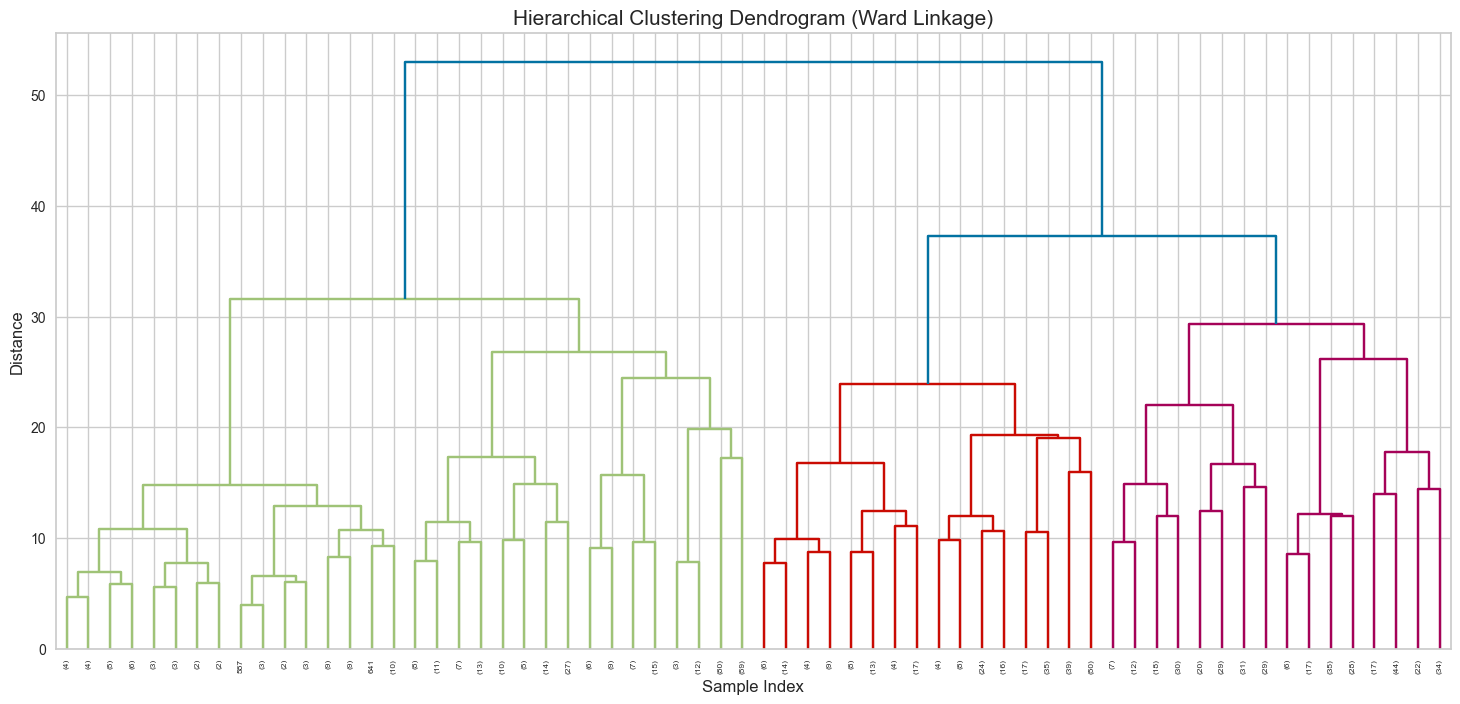

In [63]:
plt.figure(figsize=(18, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=15)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

In [64]:
cluster_profiles = processed_train.copy()
cluster_profiles['Cluster'] = kmeans_labels
cluster_profiles['Churn'] = val_train.values

In [65]:
cluster_summary = cluster_profiles.groupby('Cluster').agg({
    'Churn': 'mean',
    'State': 'mean',
    'Account length': 'mean',
    'International plan': 'mean',
    'Voice mail plan': 'mean',
    'Number vmail messages': 'mean',
    'Total day charge': 'mean',
    'Total eve minutes': 'mean',
    'Total night calls': 'mean',
    'Customer service calls': 'mean',
    'Total intl calls': 'mean'
}).sort_values('Churn', ascending=False)

In [66]:
cluster_summary.columns = [
    'Churn Rate', 
    'State Risk Level', 
    'Avg Account Length', 
    'Int\'l Plan Rate', 
    'Voice Mail Plan Rate', 
    'Avg VM Messages', 
    'Avg Day Charge', 
    'Avg Eve Minutes', 
    'Avg Night Calls',
    'Avg CS Calls',
    'Avg Int\'l Calls'
]

In [67]:
cluster_summary['Churn Rate'] = cluster_summary['Churn Rate'].map('{:.1%}'.format)
cluster_summary['Int\'l Plan Rate'] = cluster_summary['Int\'l Plan Rate'].map('{:.1%}'.format)
cluster_summary['Voice Mail Plan Rate'] = cluster_summary['Voice Mail Plan Rate'].map('{:.1%}'.format)

In [68]:
print("K-Means Cluster Profiles (sorted by Churn Rate):")
cluster_summary

K-Means Cluster Profiles (sorted by Churn Rate):


Churn Rate  State Risk Level  Avg Account Length Int'l Plan Rate  \
Cluster                                                                    
1            30.6%          1.030928           99.429553            6.9%   
2            21.2%          0.995041           98.537190           11.1%   
3             8.2%          0.893096          104.993318            9.8%   
4             7.9%          0.957014          101.893665           10.0%   
0             6.1%          0.907246           98.336232           10.4%   

        Voice Mail Plan Rate  Avg VM Messages  Avg Day Charge  \
Cluster                                                         
1                      17.5%         4.824742       30.498935   
2                       1.7%         0.317355       33.821157   
3                      18.0%         4.913140       34.924343   
4                      19.9%         5.615385       19.498891   
0                     100.0%        30.330435       33.175739   

         Avg Eve Minutes  Avg Night Calls  Avg CS Calls  Avg Int'l Calls  
Cluster                                                                   
1             198.727491       100.975945      3.831615         4.329897  
2             227.229917        98.234711      1.183471         4.533884  
3             175.023831       102.988864      1.106904         4.416481  
4             179.306335       100.923077      1.343891         4.414027  
0             217.371594        99.608696      1.237681         4.657971

## Churn Prediction

We are going to experiment with the following classification models - Random Forest, Extra Trees, Gradient Boosting, Light Gradient Boosting Machine (LGBM) and Categirical Boosting. 

In [69]:
def fit_preds(X_train, X_test, y_train, model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [70]:
random_state = 42

classifiers = []
classifiers.append(LogisticRegression(random_state=random_state, max_iter=1000))
classifiers.append(
    AdaBoostClassifier(
        DecisionTreeClassifier(random_state=random_state),
        random_state=random_state,
        learning_rate=0.1
    )
)
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LGBMClassifier(random_state = random_state))
classifiers.append(CatBoostClassifier(logging_level='Silent'))

In [71]:
kfold = StratifiedKFold(5)

In [72]:
accuracy = []
precision = []
recall = []
f1 = []
f2 =[]
roc_auc = []

for classifier in classifiers :
    y_pred = cross_val_predict(classifier, processed_train_wf, val_train, cv = kfold)
    accuracy.append(accuracy_score(y_pred, val_train))
    precision.append(precision_score(y_pred, val_train))
    recall.append(recall_score(y_pred, val_train))
    f1.append(f1_score(y_pred, val_train))
    f2.append(fbeta_score(y_pred, val_train, beta = 2))
    roc_auc.append(roc_auc_score(y_pred, val_train))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 248, number of negative: 1457
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2460
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145455 -> initscore=-1.770706
[LightGBM] [Info] Start training from score -1.770706
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 248, number of negative: 1457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2460
[LightGBM] [Info] Numb

In [73]:
index = ["LogisticRegression", "AdaBoost", "RandomForest", "ExtraTrees", "GradientBoosting", "LGBMClassifier", "CatBoostClassifier"]
df = pd.DataFrame({"Accuracy" : accuracy, "Precision" : precision, "Recall" : recall, "f1" : f1, "f2" : f2, "roc_auc" : roc_auc})
df.index = index

In [74]:
df.sort_values(["f2"],ascending = False)

Accuracy  Precision    Recall        f1        f2  \
LGBMClassifier      0.964353   0.790323  0.957031  0.865724  0.918291   
RandomForest        0.956848   0.719355  0.978070  0.828996  0.912439   
CatBoostClassifier  0.962008   0.780645  0.949020  0.856637  0.909774   
GradientBoosting    0.958724   0.758065  0.947581  0.842294  0.902458   
ExtraTrees          0.922139   0.496774  0.939024  0.649789  0.797101   
AdaBoost            0.923546   0.722581  0.744186  0.733224  0.739762   
LogisticRegression  0.882739   0.358065  0.685185  0.470339  0.579332   

                     roc_auc  
LGBMClassifier      0.961192  
RandomForest        0.966188  
CatBoostClassifier  0.956396  
GradientBoosting    0.953886  
ExtraTrees          0.929878  
AdaBoost            0.848609  
LogisticRegression  0.792085

​Based on our model evaluations, LightGBM emerged as the top performer with an F1 score of 86.6%, indicating a strong balance between precision and recall. This suggests that LightGBM effectively captures complex patterns in the data, even without extensive hyperparameter tuning.​

Random Forest achieved the highest recall at 97.8%, making it a good identifier of churned customers. However, this comes with a trade-off in precision, leading to more false positives. This aligns with the common precision-recall trade-off observed in classification models.​

CatBoost and Gradient Boosting also performed well, with F1 scores of 85.7% and 84.2% respectively, showcasing their robustness in handling complex patterns.​

On the other hand, Logistic Regression lagged with an F1 score of 47.0%, highlighting its limitations in capturing relationships among the features in our dataset.​

In summary, ensemble methods like LightGBM and Random Forest offer superior performance in churn prediction tasks by creating a good balance between precision and recall.

## Hyperparameter Optimization

We now do hyperparameter optimization to see if we can improve on our results. For each model - we create a parameter grid and perform randomized search alongwith cross validation on the training dataset. 

### Hyperparameter optimization for Light Gradient Boosting Machine

In [75]:
param_distributions = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': np.logspace(-3, 0, 10),
    'max_depth': np.arange(3, 12),
    'num_leaves': np.arange(20, 200, 20),
    'min_child_samples': np.arange(5, 100, 5),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'reg_alpha': np.logspace(-3, 1, 5),
    'reg_lambda': np.logspace(-3, 1, 5)
}

In [76]:
lgbm = LGBMClassifier(random_state=random_state)

In [77]:
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [78]:
random_search.fit(processed_train_wf, val_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines

[LightGBM] [Info] Number of positive: 248, number of negative: 1457
[LightGBM] [Info] Number of positive: 248, number of negative: 1457
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2460
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2460
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 20
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 20
[L

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_child_samples': array([ 5, 10, 15, 20, 25, 3...5, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'num_leaves': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180]),
                                        'reg_alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                        'reg_lambda': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='f1', verbose=1)

In [79]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

Best parameters: {'subsample': 0.8, 'reg_lambda': 0.001, 'reg_alpha': 0.01, 'num_leaves': 100, 'n_estimators': 250, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.046415888336127774, 'colsample_bytree': 0.6}
Best cross-validation score: 0.8579


In [80]:
bst_lgbm = LGBMClassifier(
    subsample=0.8,
    reg_lambda=0.001,
    reg_alpha=0.01,
    num_leaves=100,
    n_estimators=250,
    min_child_samples=5,
    max_depth=5,
    learning_rate=0.046415888336127774,
    colsample_bytree=0.6,
    random_state=random_state
)

In [81]:
y_pred = fit_preds(processed_train_wf, processed_test_wf, val_train, random_search.best_estimator_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 310, number of negative: 1822
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2487
[LightGBM] [Info] Number of data points in the train set: 2132, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145403 -> initscore=-1.771118
[LightGBM] [Info] Start training from score -1.771118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

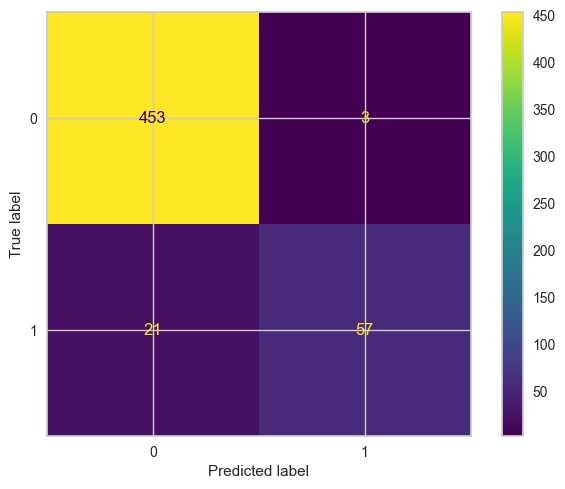

In [82]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [83]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       456
           1       0.95      0.73      0.83        78

    accuracy                           0.96       534
   macro avg       0.95      0.86      0.90       534
weighted avg       0.95      0.96      0.95       534



In [84]:
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'max_samples': [0.5, 0.7, 0.9, None]
}

In [85]:
rf_model = RandomForestClassifier(random_state=random_state)

In [86]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=3,
    random_state=42,
    return_train_score=True
)

In [87]:
random_search.fit(processed_train_wf, val_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=30, n_estimators=600;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=30, n_estimators=600;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=30, n_estimators=600;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=30, n_estimators=600;, score=(train=nan, test=nan) total

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_samples': [0.5, 0.7, 0.9, None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 30],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=3)

In [88]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

Best parameters: {'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_samples': 0.9, 'max_features': None, 'max_depth': 100, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Best cross-validation score: 0.8594


In [89]:
bst_rf = RandomForestClassifier(
    n_estimators=900, 
    min_samples_split=5, 
    min_samples_leaf=6, 
    max_samples=0.9, 
    max_features=None, 
    max_depth=100, 
    criterion='entropy', 
    class_weight='balanced', 
    bootstrap=True,
    random_state=random_state
)

In [90]:
y_pred = fit_preds(processed_train_wf, processed_test_wf, val_train, random_search.best_estimator_)

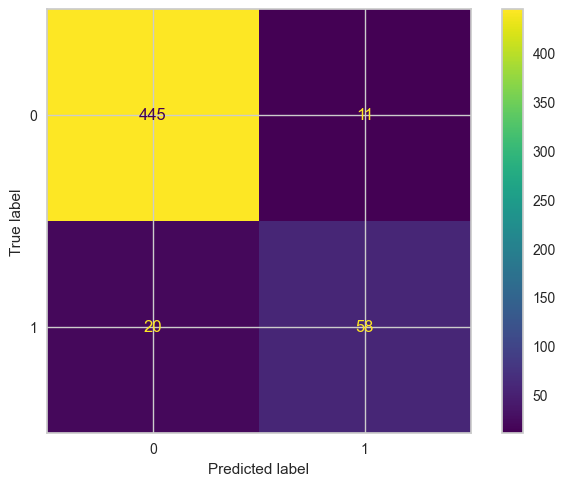

In [91]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [92]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       456
           1       0.84      0.74      0.79        78

    accuracy                           0.94       534
   macro avg       0.90      0.86      0.88       534
weighted avg       0.94      0.94      0.94       534



Hyperparameter optimization increased the F1 score from 83% to 88%

### Hyperparameter optimization for Categorical Boosting

In [93]:
param_distributions = {
    'learning_rate': np.logspace(-3, 0, 10),
    'depth': [4, 5, 6, 7, 8, 9, 10],
    'iterations': [100, 200, 300, 400, 500],
    'l2_leaf_reg': [1, 3, 5, 10, 30, 100],
    'border_count': [32, 64, 128, 254],
    'bagging_temperature': np.linspace(0, 1, 6),
    'random_strength': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'scale_pos_weight': [0.2, 0.5, 1, 2, 5, 10],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],
    'subsample': np.linspace(0.5, 1.0, 6),
}

In [94]:
base_params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'verbose': False,
    'random_seed': 42
}

catboost_model = CatBoostClassifier(**base_params)

In [95]:
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_distributions,
    n_iter=25,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=3,
    random_state=42,
    return_train_score=True
)

In [96]:
random_search.fit(processed_train_wf, val_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 3/5] END bagging_temperature=0.8, bootstrap_type=Bayesian, border_count=128, depth=4, grow_policy=Depthwise, iterations=100, l2_leaf_reg=1, learning_rate=0.046415888336127774, random_strength=1e-06, scale_pos_weight=5, subsample=0.9;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END bagging_temperature=0.8, bootstrap_type=Bayesian, border_count=128, depth=4, grow_policy=Depthwise, iterations=100, l2_leaf_reg=1, learning_rate=0.046415888336127774, random_strength=1e-06, scale_pos_weight=5, subsample=0.9;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END bagging_temperature=0.8, bootstrap_type=Bayesian, border_count=128, depth=4, grow_policy=Depthwise, iterations=100, l2_leaf_reg=1, learning_rate=0.046415888336127774, random_strength=1e-06, scale_pos_weight=5, subsample=0.9;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END bagging_temperature=0.8, bootstrap_type=Bayesian, border_count=128,

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x183c122d0>,
                   n_iter=25, n_jobs=-1,
                   param_distributions={'bagging_temperature': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                                        'bootstrap_type': ['Bayesian',
                                                           'Bernoulli', 'MVS'],
                                        'border_count': [32, 64, 128, 254],
                                        'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'grow_policy': ['SymmetricTree',
                                                        'Depthwise',
                                                        'Lossguide'],
                                        'iterati...300, 400, 500],
                                        'l2_leaf_reg': [1, 3, 5, 10, 30, 100],
                                        'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                        'random_strength': [1e-09, 1e-08, 1e-07,
                                                            1e-06, 1e-05],
                                        'scale_pos_weight': [0.2, 0.5, 1, 2, 5,
                                                             10],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=3)

In [97]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

Best parameters: {'subsample': 0.9, 'scale_pos_weight': 10, 'random_strength': 1e-06, 'learning_rate': 0.21544346900318823, 'l2_leaf_reg': 3, 'iterations': 200, 'grow_policy': 'Lossguide', 'depth': 4, 'border_count': 128, 'bootstrap_type': 'MVS', 'bagging_temperature': 0.6000000000000001}
Best cross-validation score: 0.8525


In [98]:
bst_cb = CatBoostClassifier(
    subsample=0.9, 
    scale_pos_weight=10, 
    random_strength=1e-06, 
    learning_rate=0.21544346900318823, 
    l2_leaf_reg=3, 
    iterations=200, 
    grow_policy='Lossguide', 
    depth=4, 
    border_count=128, 
    bootstrap_type='MVS', 
    bagging_temperature=0.6000000000000001,
    random_state=random_state
)

In [99]:
y_pred = fit_preds(processed_train_wf, processed_test_wf, val_train, random_search.best_estimator_)

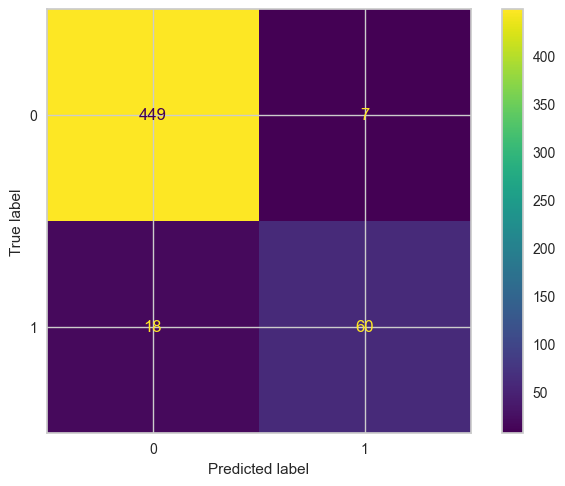

In [100]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [101]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       456
           1       0.90      0.77      0.83        78

    accuracy                           0.95       534
   macro avg       0.93      0.88      0.90       534
weighted avg       0.95      0.95      0.95       534



Hyperparameter optimization increased the F1 Score form 85.7% to 90%

We have identified our top 3 classifiers - Light Gradient Boosting Machine, Random Forest and Categorical Boost. We also have the optimal hyperparameters for these three models. Now we apply an ensembling technique using the Voting Classifier provided by the scikit-learn library. The voting classifier aggregates the predictions of each model and determines the final output based on a voting mechanism.


The voting = "hard" parameter uses predicted class labels for majority rule voting. If it is set to "soft", the voting classifier predicts the class label based on the argmax of the sum of the predicted probabilities. We experiment with both settings.

In [102]:
estimator = []
estimator.append(('RandomForest', bst_rf))
estimator.append(('CatBoost', bst_cb))
estimator.append(('LGBM', bst_lgbm))

In [103]:
vc_soft = VotingClassifier(estimators = estimator, voting ='soft')

In [104]:
y_pred = fit_preds(processed_train_wf, processed_test_wf, val_train, model = vc_soft)

0:	learn: 0.4922860	total: 1.43ms	remaining: 284ms
1:	learn: 0.3998662	total: 2.71ms	remaining: 268ms
2:	learn: 0.3512199	total: 3.86ms	remaining: 253ms
3:	learn: 0.3159006	total: 5.18ms	remaining: 254ms
4:	learn: 0.2953987	total: 6.26ms	remaining: 244ms
5:	learn: 0.2764515	total: 8.69ms	remaining: 281ms
6:	learn: 0.2591635	total: 9.68ms	remaining: 267ms
7:	learn: 0.2479316	total: 10.7ms	remaining: 257ms
8:	learn: 0.2283564	total: 11.7ms	remaining: 248ms
9:	learn: 0.2192528	total: 12.7ms	remaining: 241ms
10:	learn: 0.2123671	total: 13.8ms	remaining: 238ms
11:	learn: 0.2049934	total: 15ms	remaining: 235ms
12:	learn: 0.1975213	total: 16.1ms	remaining: 232ms
13:	learn: 0.1947404	total: 17.3ms	remaining: 229ms
14:	learn: 0.1889751	total: 18.4ms	remaining: 227ms
15:	learn: 0.1752119	total: 19.6ms	remaining: 225ms
16:	learn: 0.1672312	total: 20.8ms	remaining: 223ms
17:	learn: 0.1588253	total: 21.9ms	remaining: 221ms
18:	learn: 0.1566533	total: 23ms	remaining: 219ms
19:	learn: 0.1490676	total

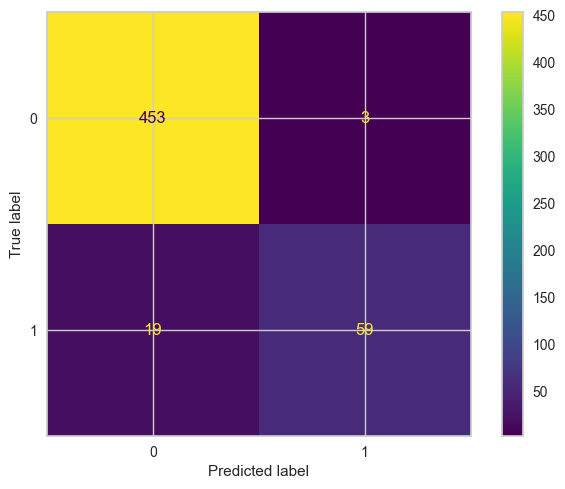

In [105]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [106]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.95      0.76      0.84        78

    accuracy                           0.96       534
   macro avg       0.96      0.87      0.91       534
weighted avg       0.96      0.96      0.96       534



In [107]:
vc_hard = VotingClassifier(estimators = estimator, voting ='hard')

In [108]:
y_pred = fit_preds(processed_train_wf, processed_test_wf, val_train, model = vc_hard)

0:	learn: 0.4922860	total: 1.28ms	remaining: 254ms
1:	learn: 0.3998662	total: 3.14ms	remaining: 311ms
2:	learn: 0.3512199	total: 4.48ms	remaining: 294ms
3:	learn: 0.3159006	total: 5.53ms	remaining: 271ms
4:	learn: 0.2953987	total: 6.57ms	remaining: 256ms
5:	learn: 0.2764515	total: 7.62ms	remaining: 246ms
6:	learn: 0.2591635	total: 8.65ms	remaining: 238ms
7:	learn: 0.2479316	total: 9.74ms	remaining: 234ms
8:	learn: 0.2283564	total: 10.7ms	remaining: 227ms
9:	learn: 0.2192528	total: 11.7ms	remaining: 222ms
10:	learn: 0.2123671	total: 12.7ms	remaining: 219ms
11:	learn: 0.2049934	total: 13.8ms	remaining: 216ms
12:	learn: 0.1975213	total: 14.8ms	remaining: 213ms
13:	learn: 0.1947404	total: 15.8ms	remaining: 210ms
14:	learn: 0.1889751	total: 16.8ms	remaining: 207ms
15:	learn: 0.1752119	total: 17.9ms	remaining: 206ms
16:	learn: 0.1672312	total: 18.9ms	remaining: 204ms
17:	learn: 0.1588253	total: 19.9ms	remaining: 202ms
18:	learn: 0.1566533	total: 21.3ms	remaining: 203ms
19:	learn: 0.1490676	t

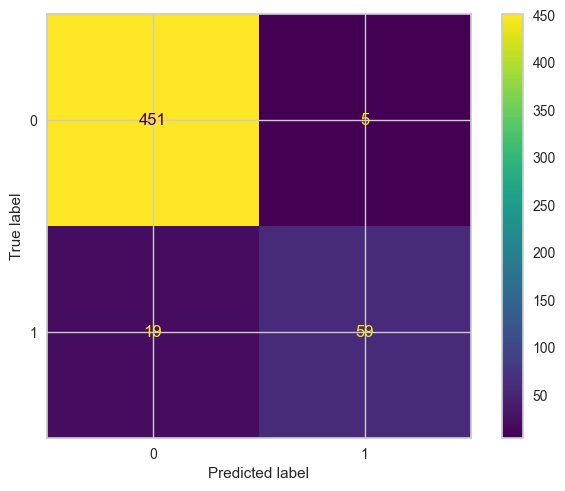

In [109]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [110]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       456
           1       0.92      0.76      0.83        78

    accuracy                           0.96       534
   macro avg       0.94      0.87      0.90       534
weighted avg       0.95      0.96      0.95       534



We see that the hard voting classifier returns a F1 score of 90% while the soft voting classifier returns a F1 score of 91%. 

# Running the models on the Test set

In [111]:
test_raw.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

In [112]:
X_test = test_raw.drop("Churn", axis = 1)
y_test = test_raw["Churn"]

In [113]:
X_test["State"].replace(churn_less10,0, inplace = True)
X_test["State"].replace(churn_more10,1, inplace = True)
X_test["State"].replace(churn_more20,2, inplace = True)

In [114]:
X_test.replace(["No","Yes"],[0,1], inplace = True)
X_test.replace([False,True],[0,1], inplace = True)

In [115]:
X_test["Customer service calls"]=np.where(X_test["Customer service calls"] >= 4, 1,0 )

In [116]:
X_train = pipeline.fit_transform(train_processsed)
X_test = pipeline.transform(X_test)

In [117]:
val_processed.value_counts()

Churn
0    2278
1     388
Name: count, dtype: int64

In [118]:
X_un, y_un = shuffle(X_train, val_processed)

In [119]:
X_churn = X_un.loc[y_un == 1]
X_non_churn = X_un.loc[y_un == 0][:388]

In [120]:
y_churn = y_un.loc[y_un == 1]
y_non_churn = y_un.loc[y_un == 0][:388]

Since we have an imbalanced dataset, we perform balancing techniques like undersampling, random oversampling and Synthetic Minority Oversampling Technique (SMOTE)

In [121]:
X_undersampled = pd.concat([X_churn, X_non_churn])
y_undersampled = pd.concat([y_churn, y_non_churn])

In [122]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, val_processed)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 2278, 1: 2278})


In [123]:
cat_cols = [0,1,2,17,18]
smote = SMOTENC(cat_cols,random_state=42)

In [124]:
X_smote, y_smote = smote.fit_resample(X_train, val_processed)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 2278, 1: 2278})


In [125]:
def plot_roc_curve(y_test,y_pred, ax):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    ax.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel("False positve rate")
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve')
    ax.legend(loc='lower right')

In [126]:
models = [("Random Forest", bst_rf), ('LightGBM', bst_lgbm),("CatBoost", bst_cb),("Votintg Soft", vc_soft),("Voting hard", vc_hard)]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 2278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2513
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145536 -> initscore=-1.770048
[LightGBM] [Info] Start training from score -1.770048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

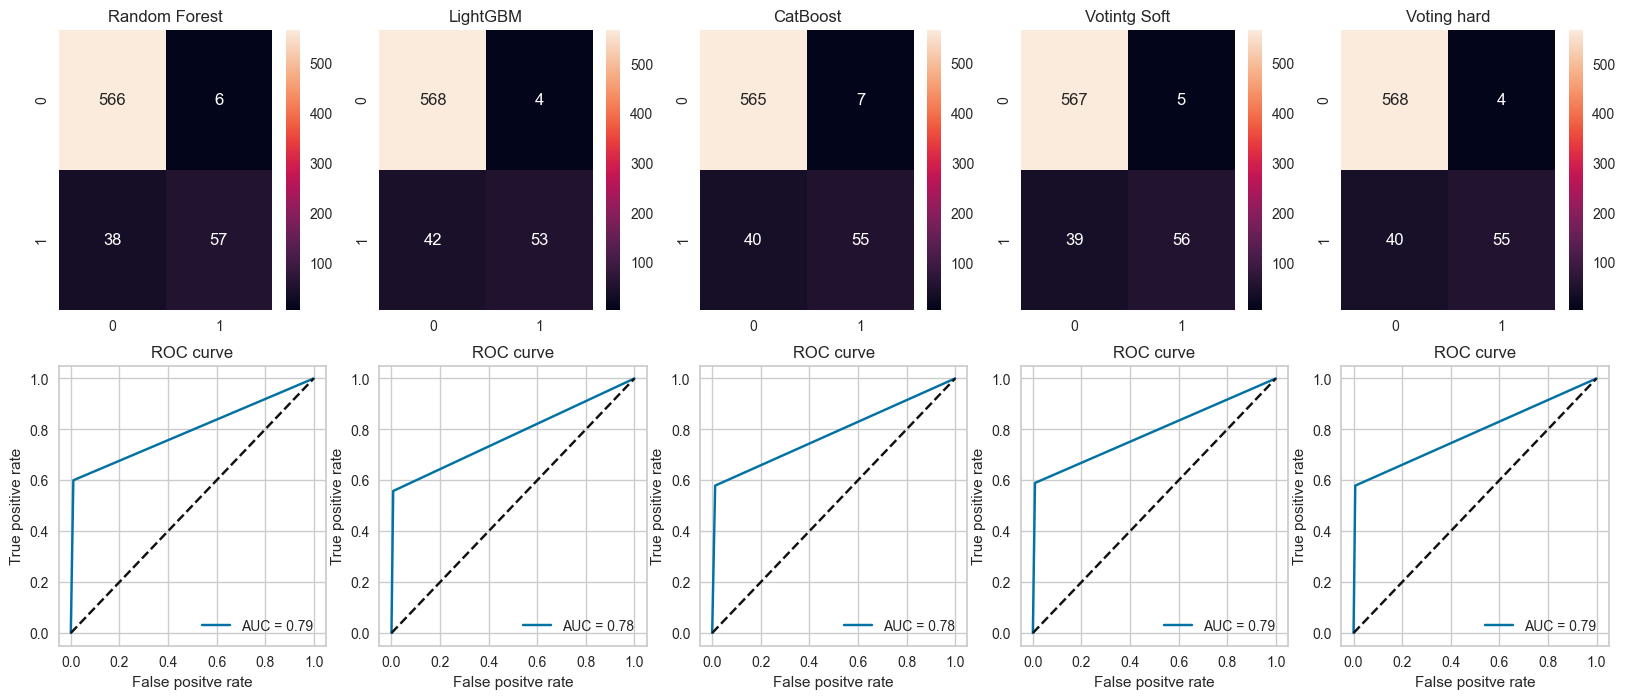

In [127]:
fig,ax = plt.subplots(2, 5, figsize = (20,8))
for i,model in enumerate(models):
    ax[0,i].set_title(model[0])
    y_pred = fit_preds(X_train, X_test, val_processed, model = model[1])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax = ax[0,i])
    plot_roc_curve(y_test, y_pred, ax[1,i])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2353
[LightGBM] [Info] Number of data points in the train set: 776, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

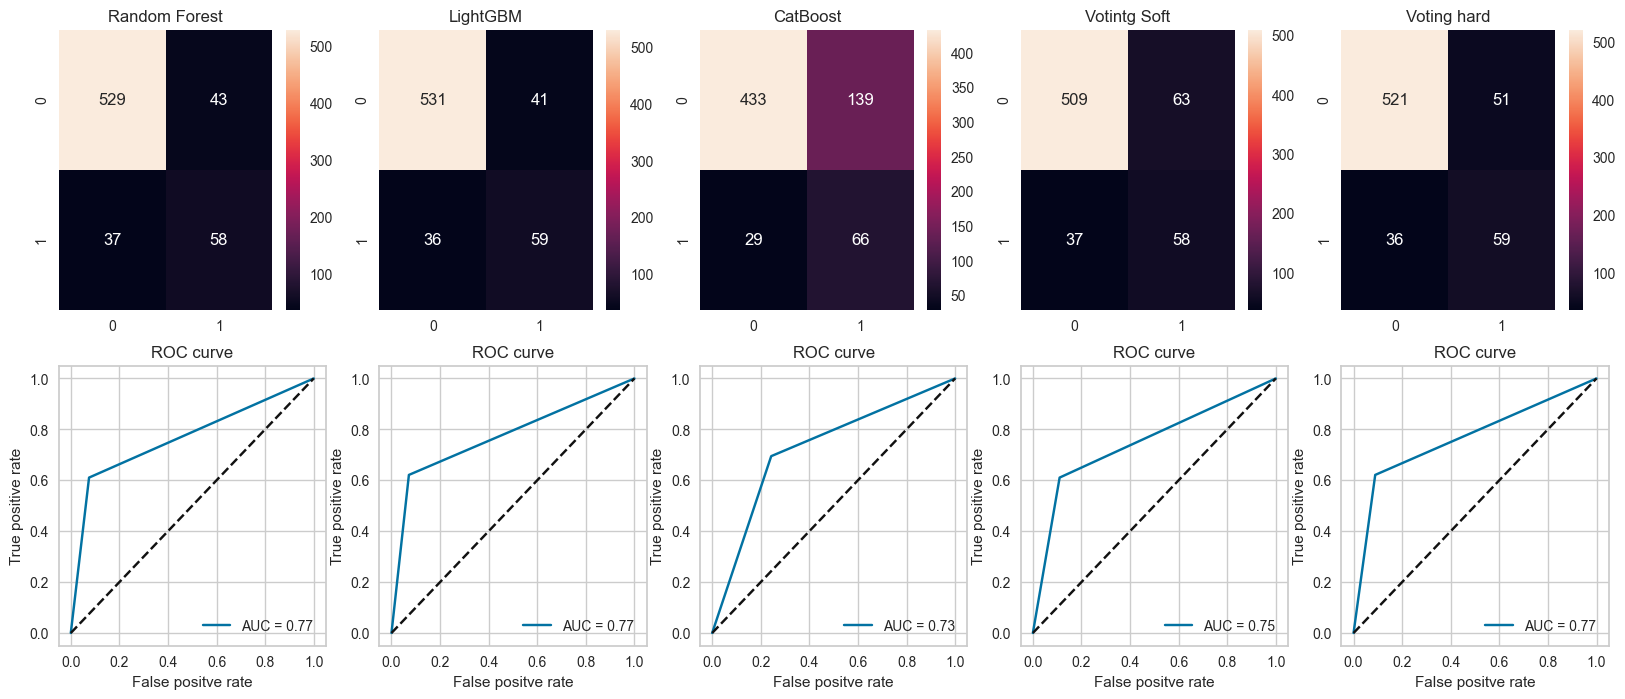

In [128]:
fig,ax = plt.subplots(2,5, figsize = (20,8))
for i,model in enumerate(models):
    y_pred = fit_preds(X_undersampled, X_test, y_undersampled, model = model[1])
    ax[0,i].set_title(model[0])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test, y_pred, ax[1,i])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2278, number of negative: 2278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 4556, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

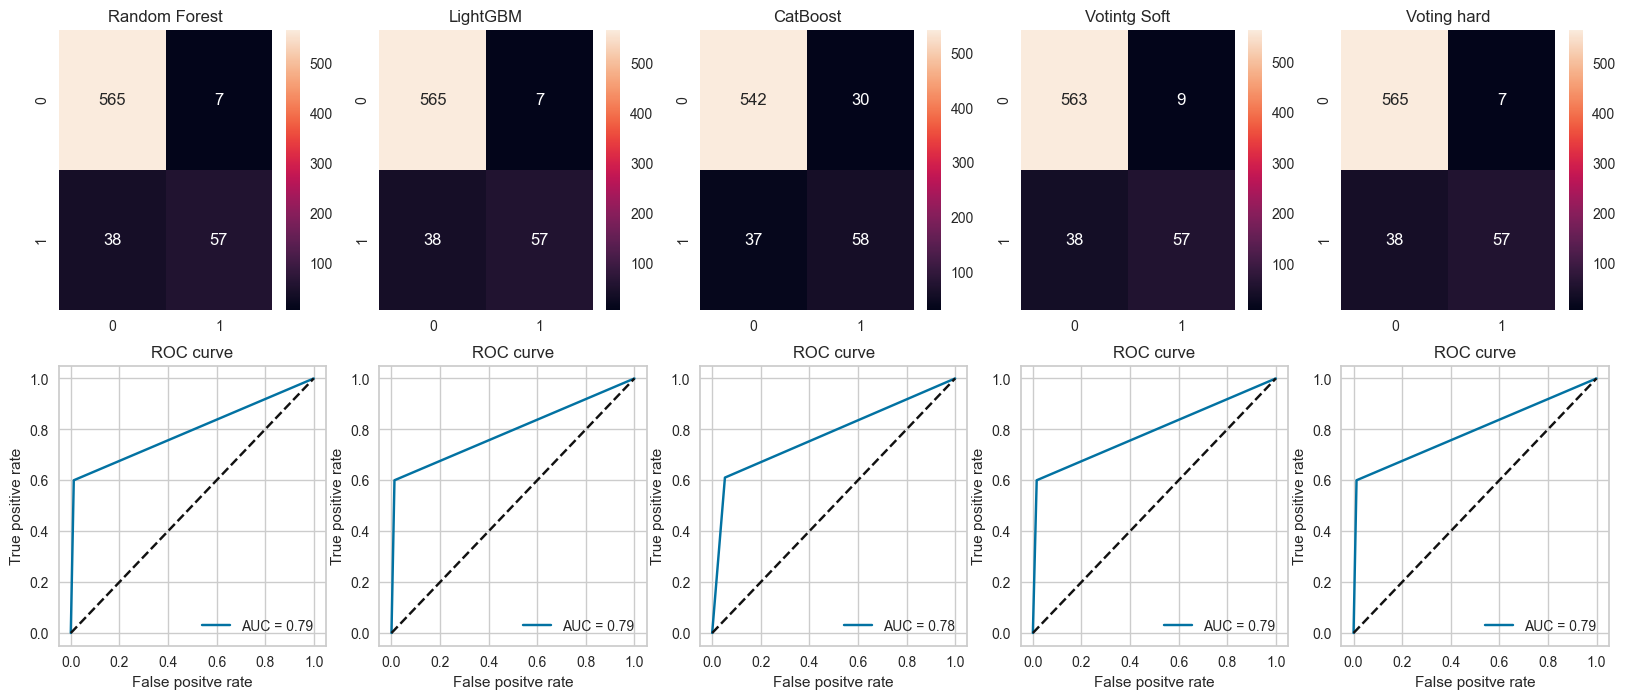

In [129]:
fig,ax = plt.subplots(2,5, figsize = (20,8))
for i,model in enumerate(models):
    ax[0,i].set_title(model[0])
    y_pred = fit_preds(X_resampled, X_test, y_resampled, model = model[1])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test, y_pred, ax[1,i])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2278, number of negative: 2278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3583
[LightGBM] [Info] Number of data points in the train set: 4556, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

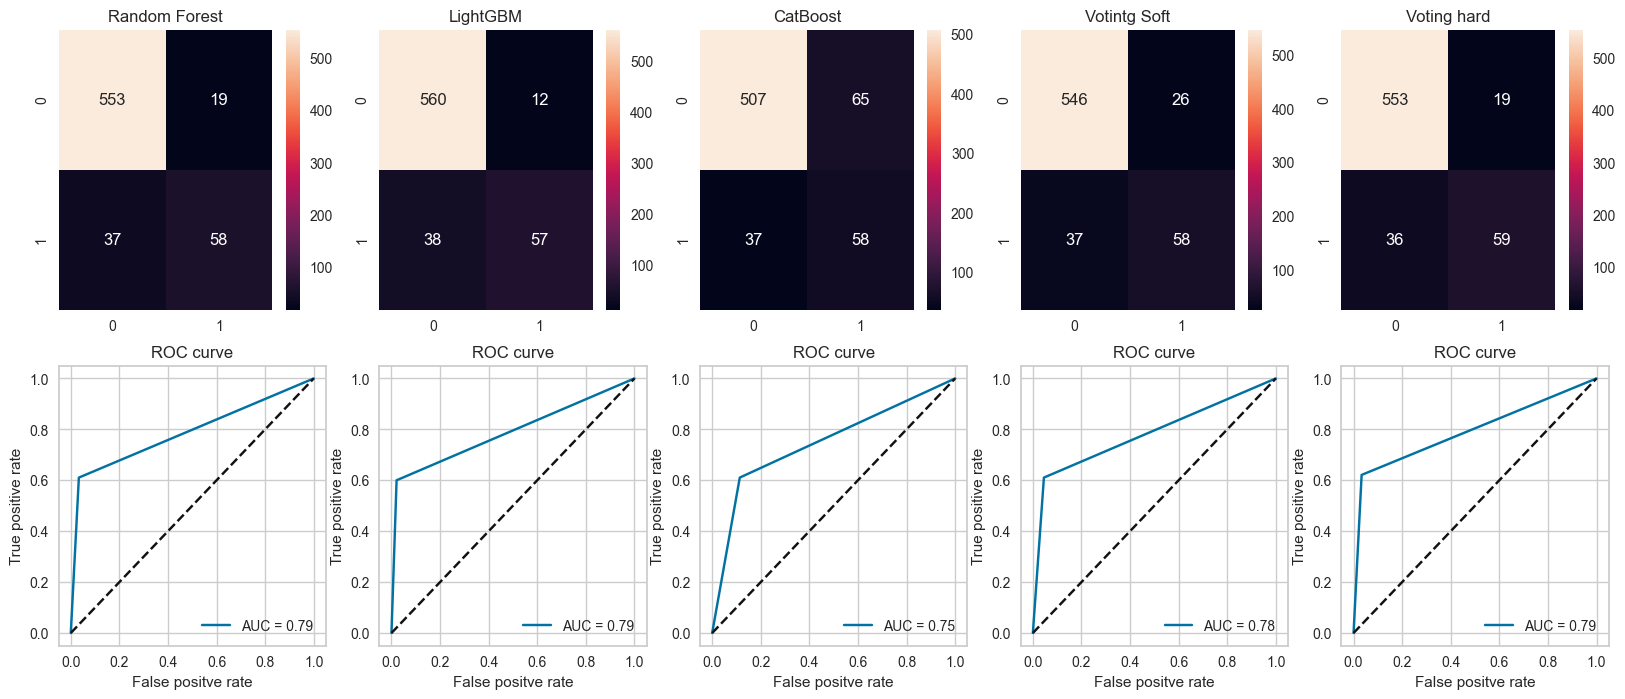

In [130]:
fig,ax = plt.subplots(2,5, figsize = (20,8))
for i,model in enumerate(models):
    ax[0,i].set_title(model[0])
    y_pred = fit_preds(X_smote, X_test, y_smote, model = model[1])
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test,y_pred,ax[1,i])

In [131]:
y_pred = fit_preds(X_train, X_test, val_processed, model = bst_rf)
importances = bst_rf.feature_importances_

In [132]:
importances_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)

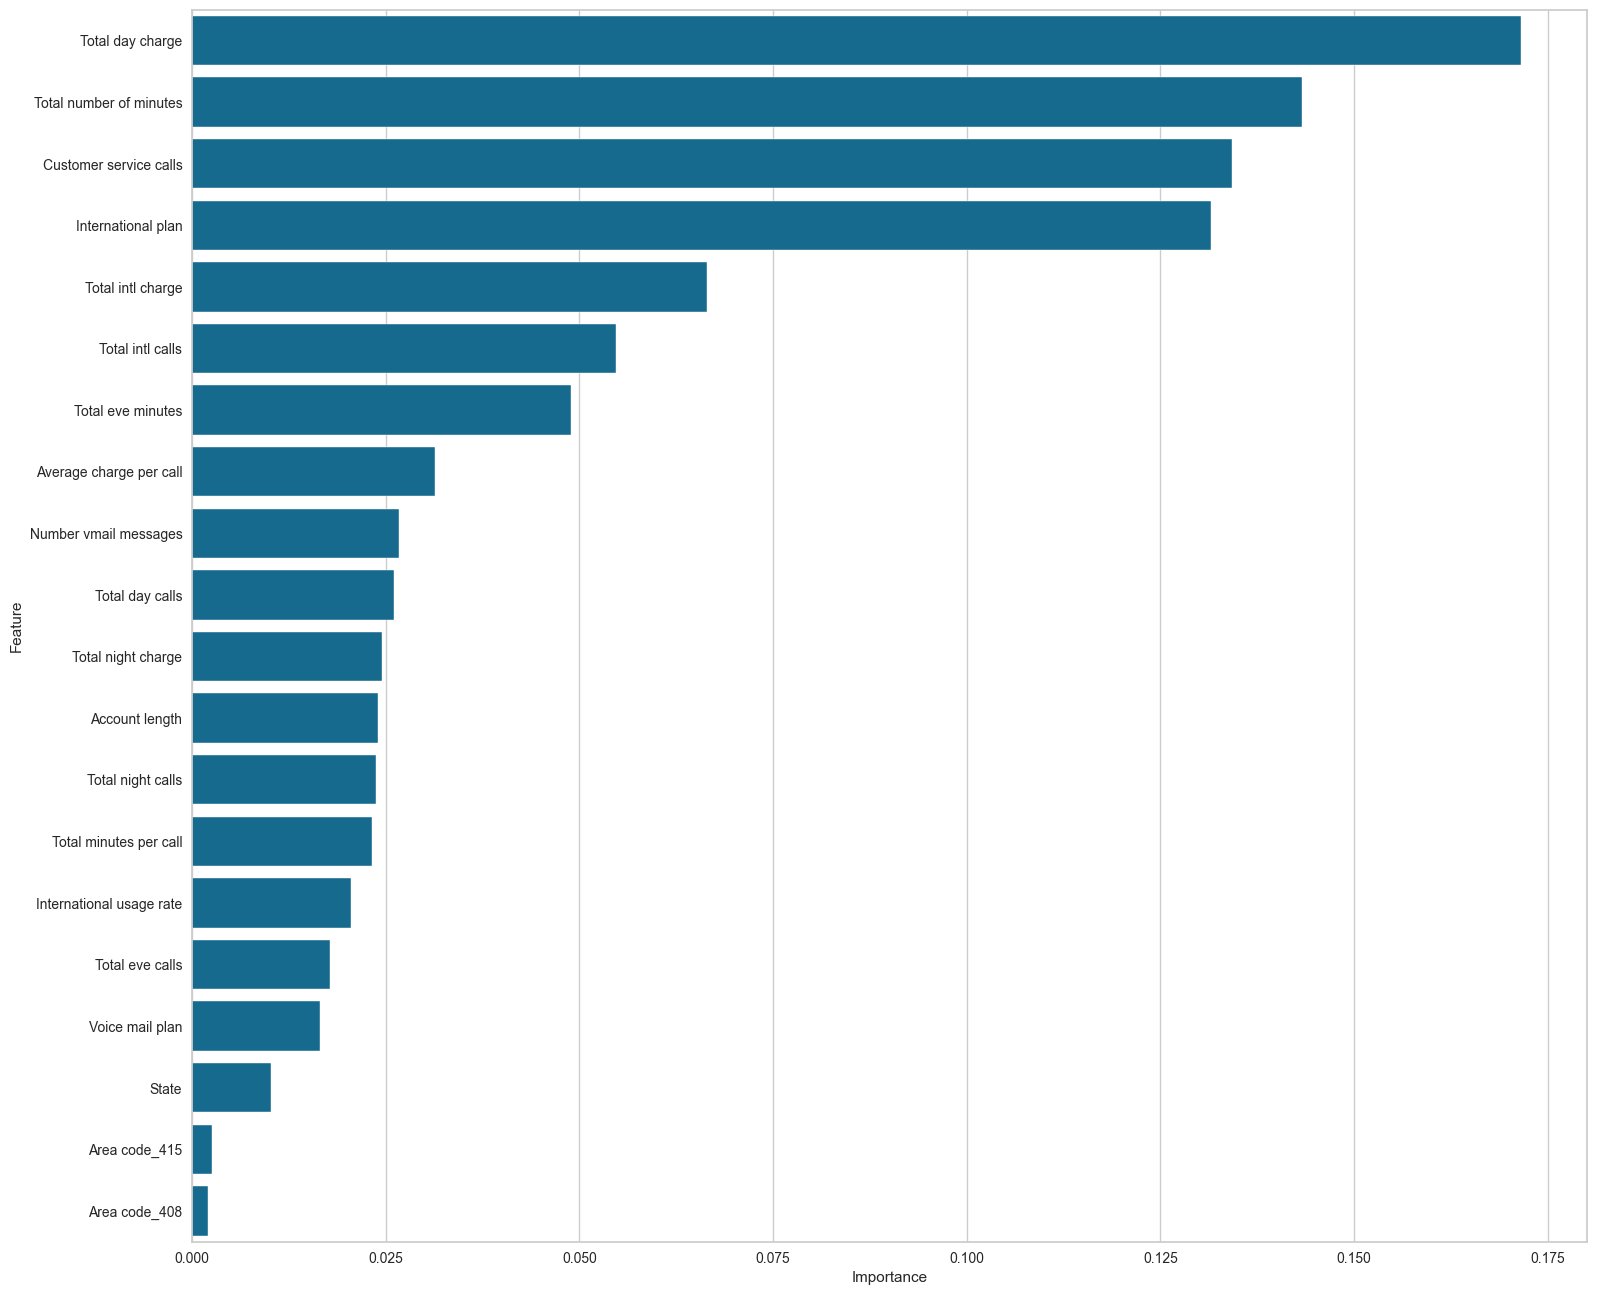

In [133]:
plt.figure(figsize=(18, 16))
sns.barplot(x="Importance", y="Feature", data=importances_df)
plt.show()